# Setting up

Creation of an virtual environment in the terminal, it's called synth-env.
By specification of only Python only without any version, the latest bug-free version is choose automatically. 
Which is in this case Python 3.12.1!
Activation of the environment also in the terminal.
Installing the requirements.txt libraries
Getting started :-) using: https://medium.com/@naime.diler/erstellung-und-verwaltung-einer-virtuellen-python-environment-mit-conda-6651cd014eae

Import all needed packages


In [178]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as plt
from matplotlib import *
import sys
import pylab as pl
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, QuantileTransformer
import missingno as msno
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn import set_config
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import MissingIndicator
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import FunctionTransformer
from sklearn import set_config
from sklearn.ensemble import GradientBoostingRegressor
import shap
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import plotly.express as px
import plotly.graph_objects as go





%matplotlib inline


# Data

Import data needed

In [2]:
df = pd.read_csv("data.csv")  # Import the csv file as DataFrame


# Explore data

overall exploration

In [3]:
df.info()  # Get first impression of different columns and data types
df.dtypes.value_counts()  # Get amount of columns via data type


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7146 entries, 0 to 7145
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PropertyID    7146 non-null   int64  
 1   PropType      7146 non-null   object 
 2   taxkey        7146 non-null   int64  
 3   Address       7146 non-null   object 
 4   CondoProject  885 non-null    object 
 5   District      7146 non-null   int64  
 6   nbhd          7146 non-null   int64  
 7   Style         7125 non-null   object 
 8   Extwall       6220 non-null   object 
 9   Stories       7107 non-null   float64
 10  Year_Built    7135 non-null   float64
 11  Rooms         6703 non-null   float64
 12  FinishedSqft  7122 non-null   float64
 13  Units         7146 non-null   int64  
 14  Bdrms         6703 non-null   float64
 15  Fbath         7146 non-null   int64  
 16  Hbath         7146 non-null   int64  
 17  Lotsize       7146 non-null   int64  
 18  Sale_date     7146 non-null 

int64      8
object     6
float64    6
Name: count, dtype: int64

In [4]:
round(df.isna().sum() / len(df), 2)  # Checking for nan values
# Column CondoProject has so many, that it doesn't seem to be a valuable variable anymore


PropertyID      0.00
PropType        0.00
taxkey          0.00
Address         0.00
CondoProject    0.88
District        0.00
nbhd            0.00
Style           0.00
Extwall         0.13
Stories         0.01
Year_Built      0.00
Rooms           0.06
FinishedSqft    0.00
Units           0.00
Bdrms           0.06
Fbath           0.00
Hbath           0.00
Lotsize         0.00
Sale_date       0.00
Sale_price      0.00
dtype: float64

In [5]:
df.duplicated()  # No dublicates according to the column PropertyID, which functions as a key


0       False
1       False
2       False
3       False
4       False
        ...  
7141    False
7142    False
7143    False
7144    False
7145    False
Length: 7146, dtype: bool

In [6]:
# Explore some columns, which are not clear ba their initial naming convention
df.head(10)


PropertyID       PropType    taxkey                 Address  \
0       98461  Manufacturing  30131000    9434-9446 N 107TH ST   
1       98464     Commercial  30152000    9306-9316 N 107TH ST   
2       98508    Residential  49980110          9327 N SWAN RD   
3       98519    Residential  49993200   9411 W COUNTY LINE RD   
4       98561    Residential  50042000         9322 N JOYCE AV   
5       98593    Residential  50074000          9360 N 85TH ST   
6       98604    Residential  50085000       9305 N BURBANK AV   
7       98608    Residential  50089000          9217 N 83RD ST   
8       98696    Condominium  70017000  9192 N 70TH ST, Unit 2   
9       98715    Condominium  70036000  9212 N 70TH ST, Unit 8   

           CondoProject  District  nbhd                      Style  \
0                   NaN         9  6300           Service Building   
1                   NaN         9  6202  Office Building - 1 Story   
2                   NaN         9    40                        NaN   
3                   NaN         9    40                      Ranch   
4                   NaN         9    40                      Ranch   
5                   NaN         9    40                      Ranch   
6                   NaN         9    40                      Ranch   
7                   NaN         9    40                   Colonial   
8  NORTHRIDGE WOOD LAKE         9  5010            Condo Townhouse   
9  NORTHRIDGE WOOD LAKE         9  5010            Condo Townhouse   

          Extwall  Stories  Year_Built  Rooms  FinishedSqft  Units  Bdrms  \
0  Concrete Block      1.0      1978.0    NaN       20600.0      6    NaN   
1           Brick      1.0      1982.0    NaN        9688.0     23    NaN   
2             NaN      NaN         NaN    NaN           NaN      0    NaN   
3  Aluminum/Vinyl      1.0      1959.0    6.0        1334.0      1    3.0   
4  Aluminum/Vinyl      1.0      1980.0   10.0        1006.0      1    6.0   
5  Aluminum/Vinyl      1.0      1982.0    5.0        1007.0      1    3.0   
6  Aluminum/Vinyl      1.0      1984.0    5.0        1301.0      1    3.0   
7  Aluminum/Vinyl      2.0      2007.0    9.0        2237.0      1    4.0   
8             NaN      2.0      1973.0    7.0        1437.0      1    3.0   
9             NaN      2.0      1973.0    7.0        1437.0      1    4.0   

   Fbath  Hbath  Lotsize   Sale_date  Sale_price  
0      0      0        0  2022-04-01    950000.0  
1      0      0    35719  2022-10-07    385000.0  
2      0      0  1341648  2022-01-07    800000.0  
3      1      1    83200  2022-08-09    280000.0  
4      1      0     8303  2022-05-23    233100.0  
5      1      0     7200  2022-07-25    215000.0  
6      2      0     7200  2022-03-29    150000.0  
7      2      1    15677  2022-05-10    400000.0  
8      2      1        0  2022-05-16    122000.0  
9      2      1        0  2022-04-14    123000.0

Build subset of usefull features

In [7]:
# First it's important to get a rough idea about the variables, which could influence the sales price
# Therefor a subset was built based on first assumptions
# 10 Variables are remaining + Sale_price as target variable
cols = [
    "District",
    "PropType",
    "Style",
    "nbhd",
    "FinishedSqft",
    "Fbath",
    "Hbath",
    "Extwall",
    "Year_Built",
    "Rooms",
    "Units",
    "Bdrms",
    "Lotsize",
    "Sale_date",
    "Sale_price",
    "Stories",
]
df[cols]


District       PropType                      Style  nbhd  FinishedSqft  \
0            9  Manufacturing           Service Building  6300       20600.0   
1            9     Commercial  Office Building - 1 Story  6202        9688.0   
2            9    Residential                        NaN    40           NaN   
3            9    Residential                      Ranch    40        1334.0   
4            9    Residential                      Ranch    40        1006.0   
...        ...            ...                        ...   ...           ...   
7141        13    Condominium       Low Rise 1-3 Stories  5360        1100.0   
7142        13    Condominium       Low Rise 1-3 Stories  5360        1379.0   
7143        13    Condominium       Low Rise 1-3 Stories  5360        1100.0   
7144        13    Condominium       Low Rise 1-3 Stories  5360        1100.0   
7145        13    Condominium       Low Rise 1-3 Stories  5360        1141.0   

      Fbath  Hbath         Extwall  Year_Built  Rooms  Units  Bdrms  Lotsize  \
0         0      0  Concrete Block      1978.0    NaN      6    NaN        0   
1         0      0           Brick      1982.0    NaN     23    NaN    35719   
2         0      0             NaN         NaN    NaN      0    NaN  1341648   
3         1      1  Aluminum/Vinyl      1959.0    6.0      1    3.0    83200   
4         1      0  Aluminum/Vinyl      1980.0   10.0      1    6.0     8303   
...     ...    ...             ...         ...    ...    ...    ...      ...   
7141      1      1             NaN      1974.0   10.0      1    4.0        1   
7142      1      1             NaN      1974.0    5.0      1    2.0        1   
7143      1      1             NaN      1974.0   10.0      1    4.0        1   
7144      1      1             NaN      1974.0    5.0      1    2.0        1   
7145      1      1             NaN      1974.0    5.0      1    2.0        1   

       Sale_date  Sale_price  Stories  
0     2022-04-01    950000.0      1.0  
1     2022-10-07    385000.0      1.0  
2     2022-01-07    800000.0      NaN  
3     2022-08-09    280000.0      1.0  
4     2022-05-23    233100.0      1.0  
...          ...         ...      ...  
7141  2022-03-11    125900.0      2.0  
7142  2022-10-28    150000.0      1.0  
7143  2022-03-15    130000.0      2.0  
7144  2022-12-30    123000.0      2.0  
7145  2022-07-08    157500.0      1.0  

[7146 rows x 16 columns]

Explore column by column

In [8]:
df[cols].nunique()  # Check how many unique values each column has


District          15
PropType           6
Style             81
nbhd             459
FinishedSqft    2386
Fbath              8
Hbath              4
Extwall           18
Year_Built       155
Rooms             40
Units             49
Bdrms             24
Lotsize         1670
Sale_date        313
Sale_price      1284
Stories           13
dtype: int64

In [9]:
# Transform neighborhood to string, as it is not a nummerical feature
df["nbhd"] = df["nbhd"].values.astype(str)


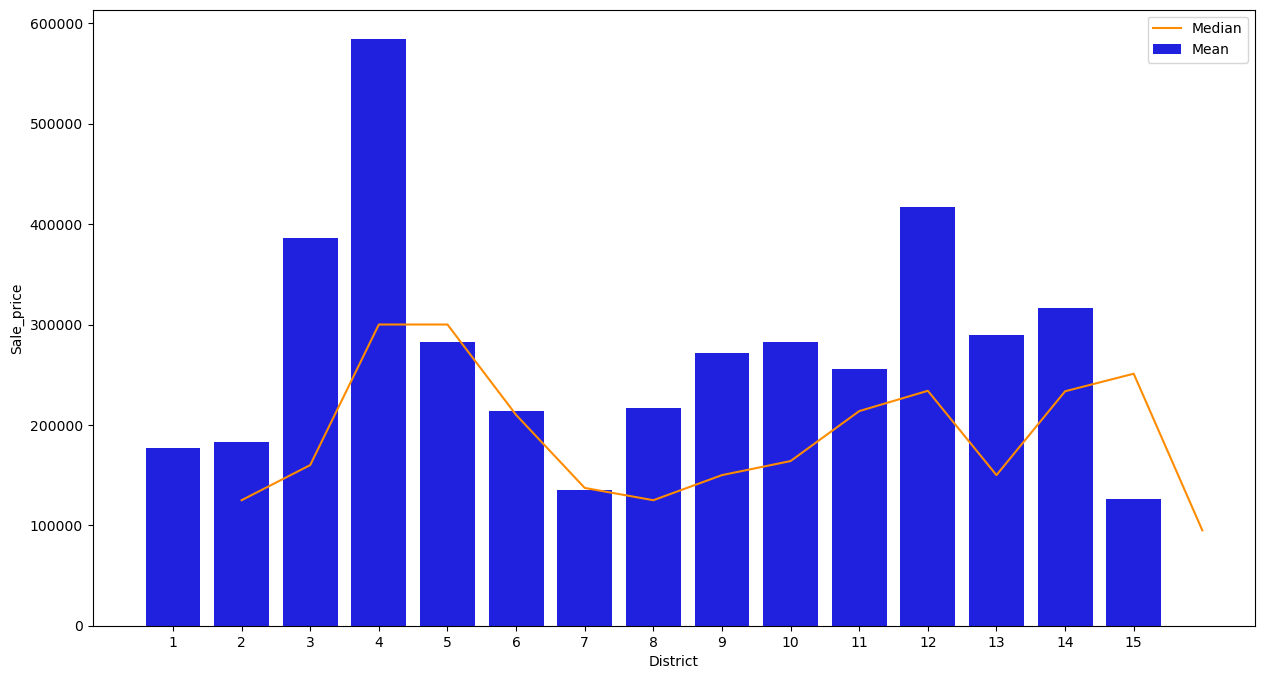

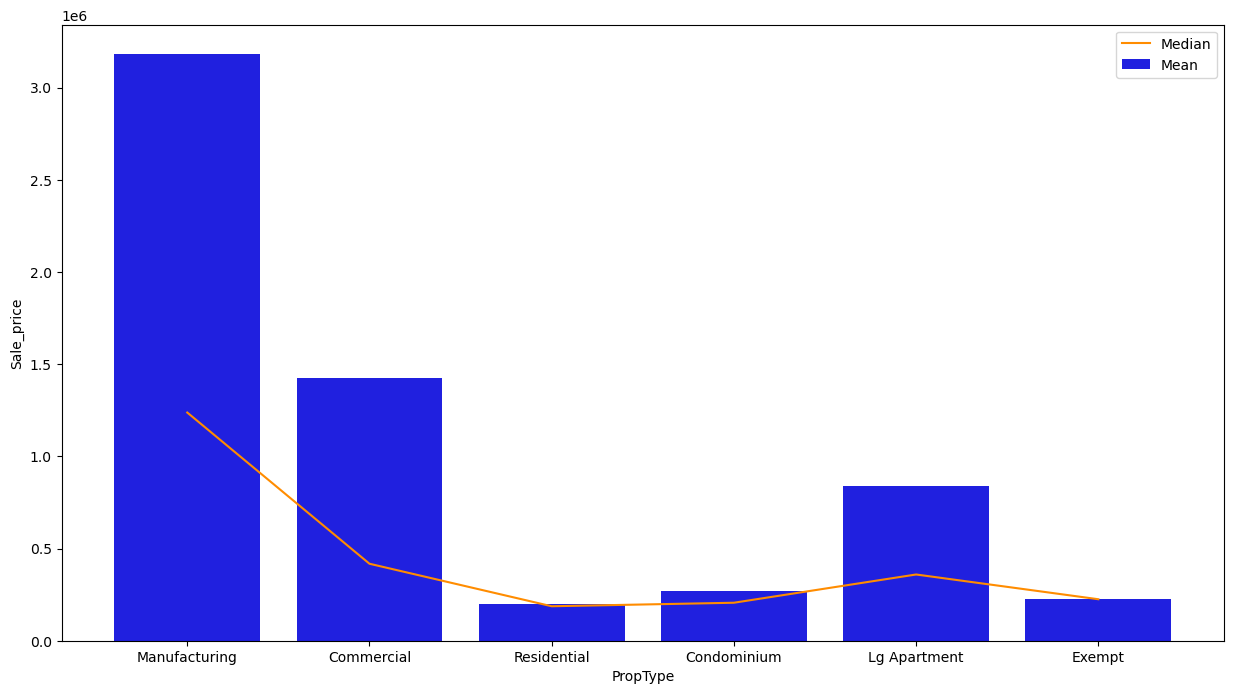

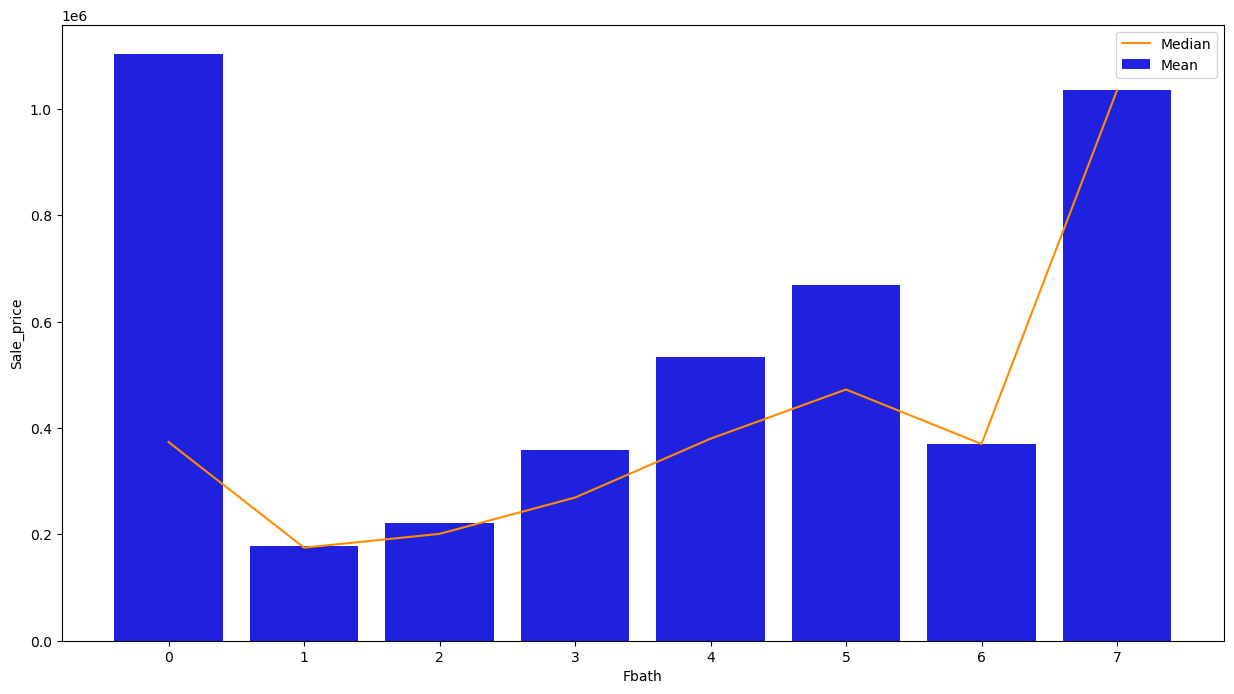

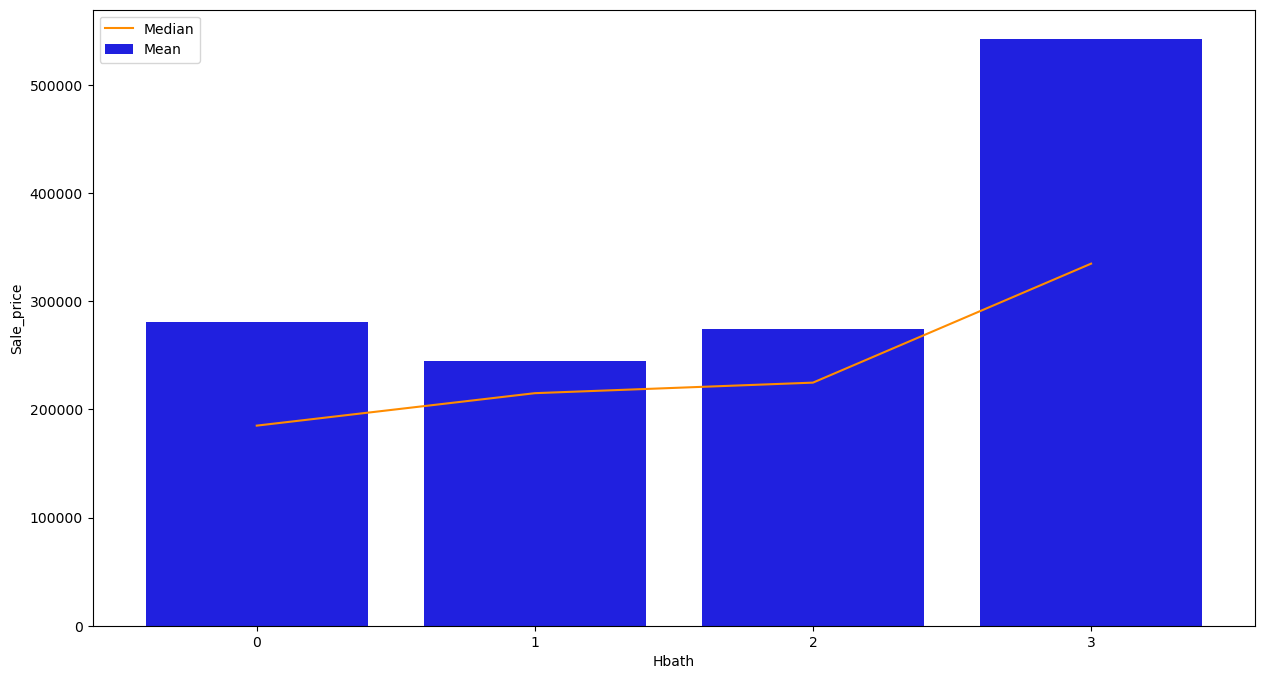

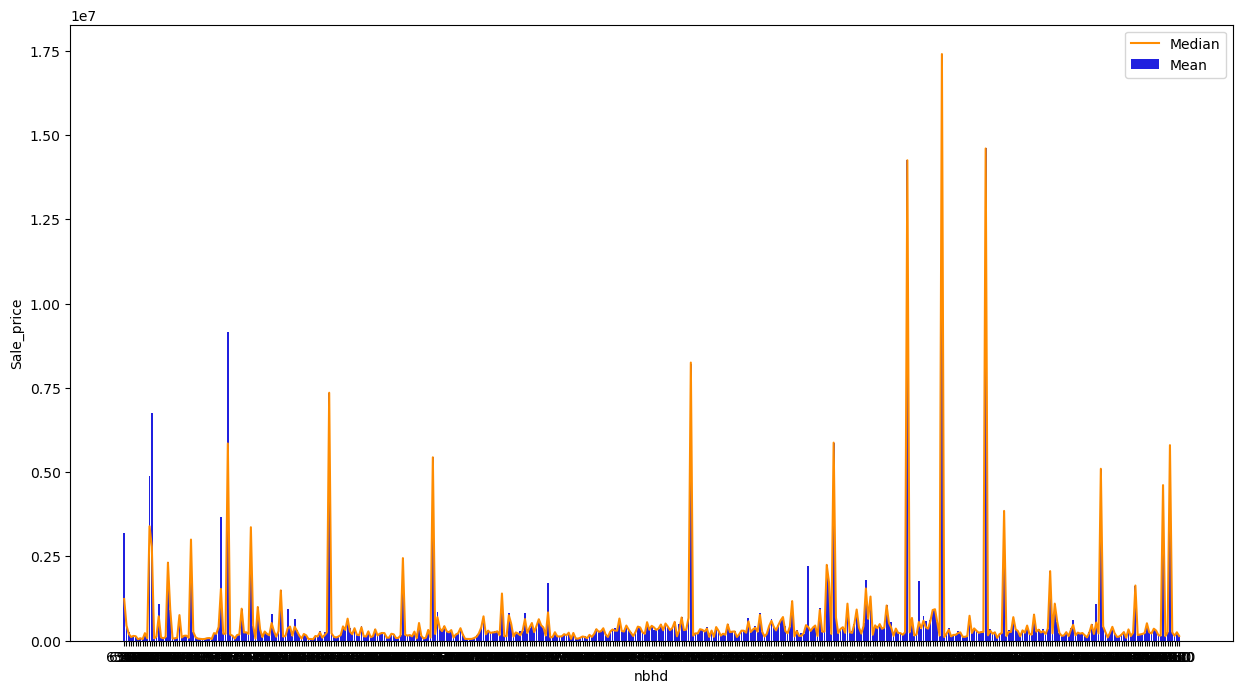

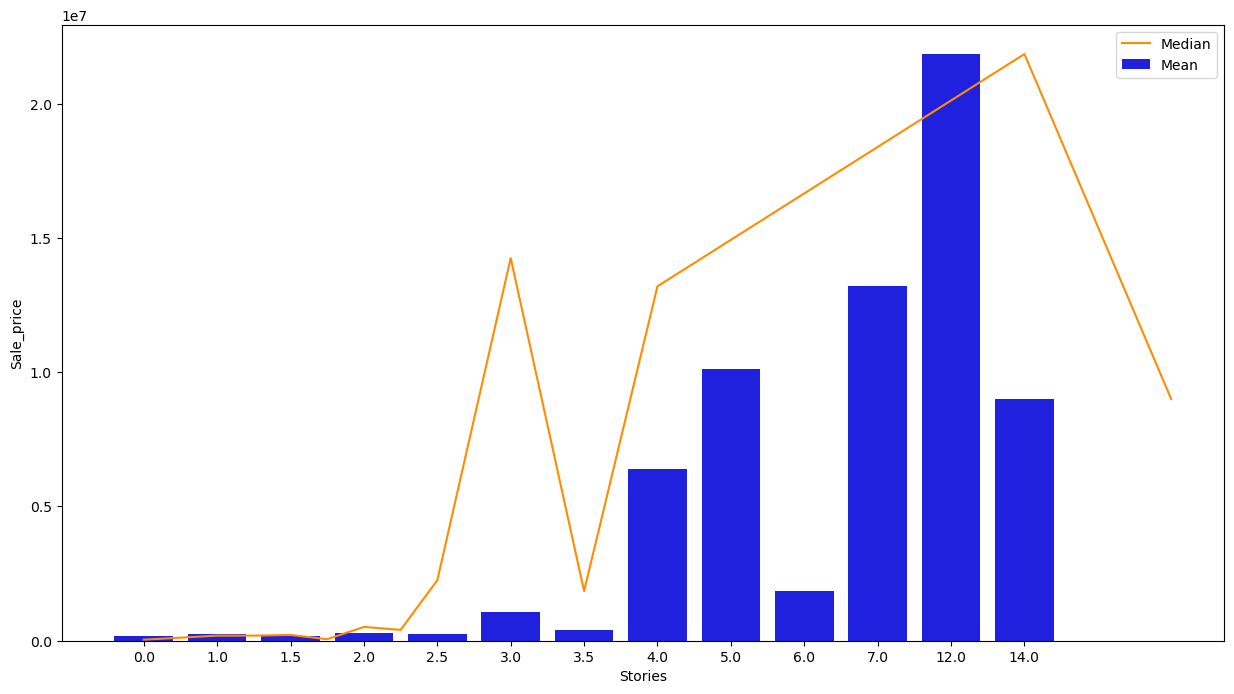

In [10]:
# Plotting the two columns with barplot due to amount of variety they offer
# Using Mean and Median do display differences, especially with prices the median-mean-spread supports a deeper understanding
col_barplot = ["District", "PropType", "Fbath", "Hbath", "nbhd", "Stories"]
for col in df[col_barplot]:
    ax = plt.subplots(figsize=(15, 8))
    ax = sns.barplot(
        x=col,
        y="Sale_price",
        data=df,
        estimator="mean",
        color="b",
        errorbar=None,
        label="Mean",
    )  # Show mean as barplot
    ax = sns.lineplot(
        x=col,
        y="Sale_price",
        data=df,
        estimator="median",
        color="darkorange",
        errorbar=None,
        label="Median",
    )  # Show median as lineplot
    ax.set(xlabel=col, ylabel="Sale_price")
    plt.show()


/var/folders/96/tqdv_j8d1td69fwj_dc4jwk80000gn/T/ipykernel_26023/3615557956.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


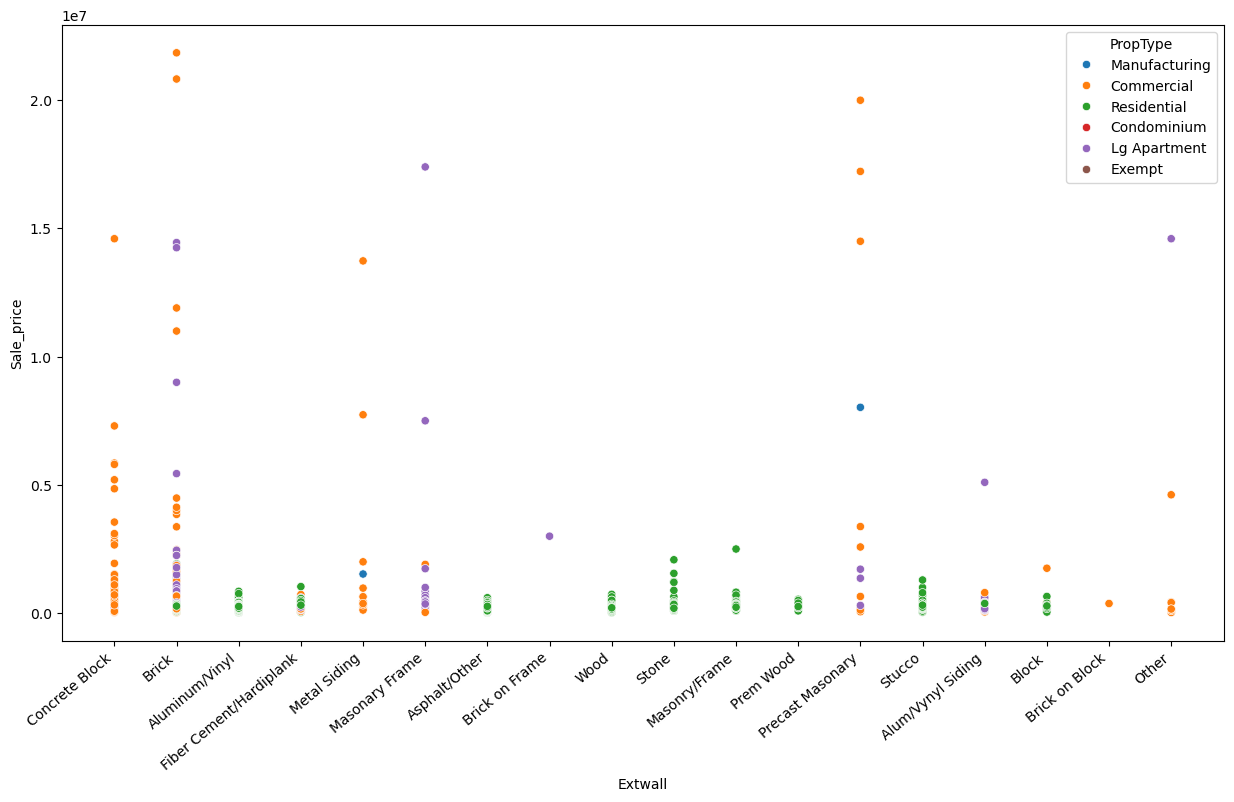

/var/folders/96/tqdv_j8d1td69fwj_dc4jwk80000gn/T/ipykernel_26023/3615557956.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


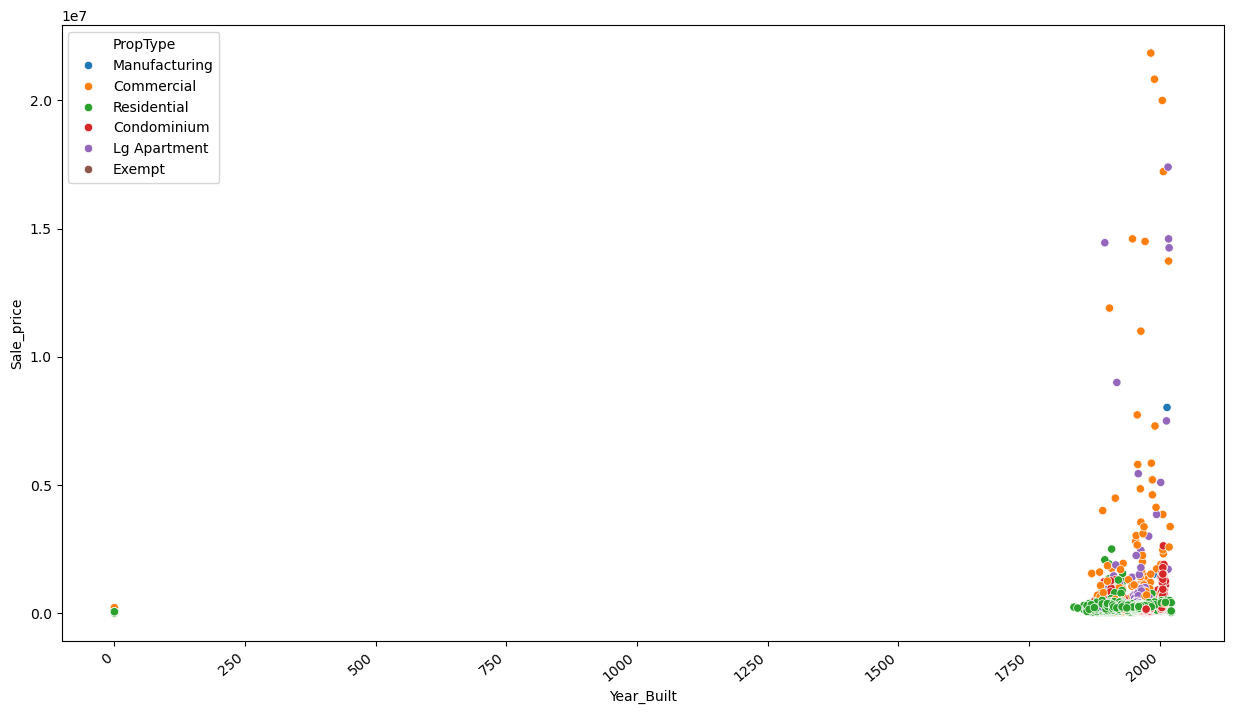

/var/folders/96/tqdv_j8d1td69fwj_dc4jwk80000gn/T/ipykernel_26023/3615557956.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


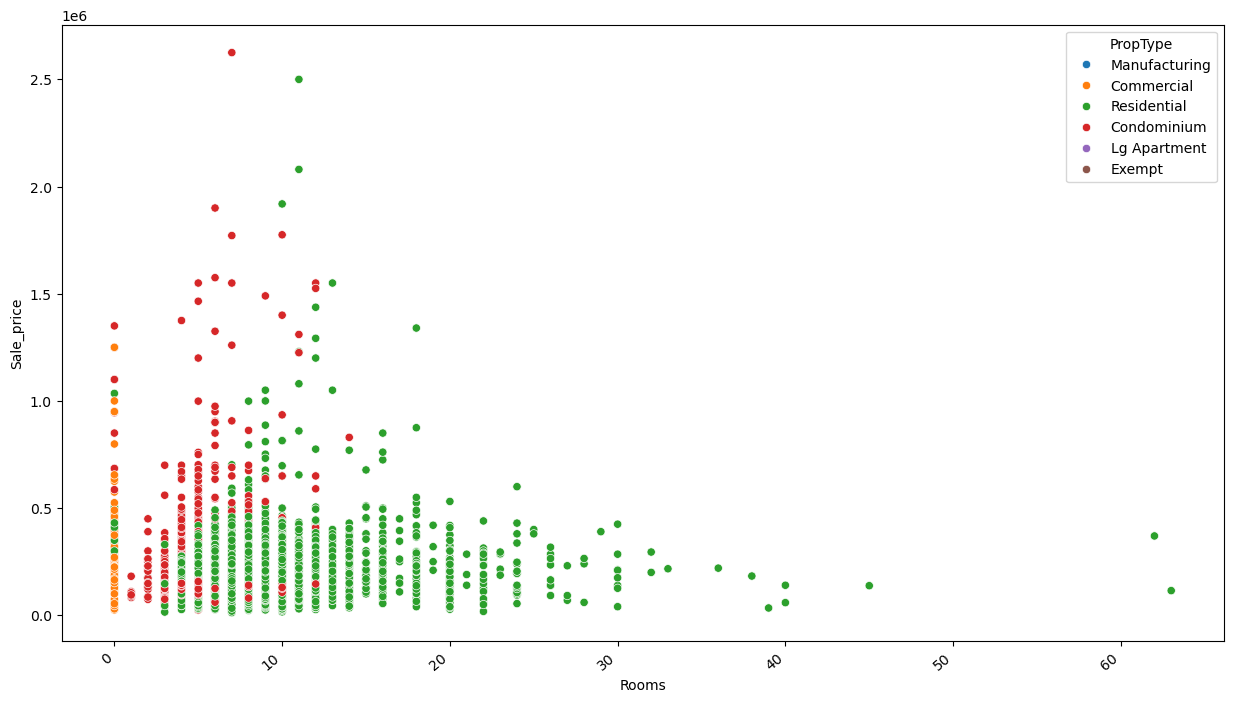

/var/folders/96/tqdv_j8d1td69fwj_dc4jwk80000gn/T/ipykernel_26023/3615557956.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


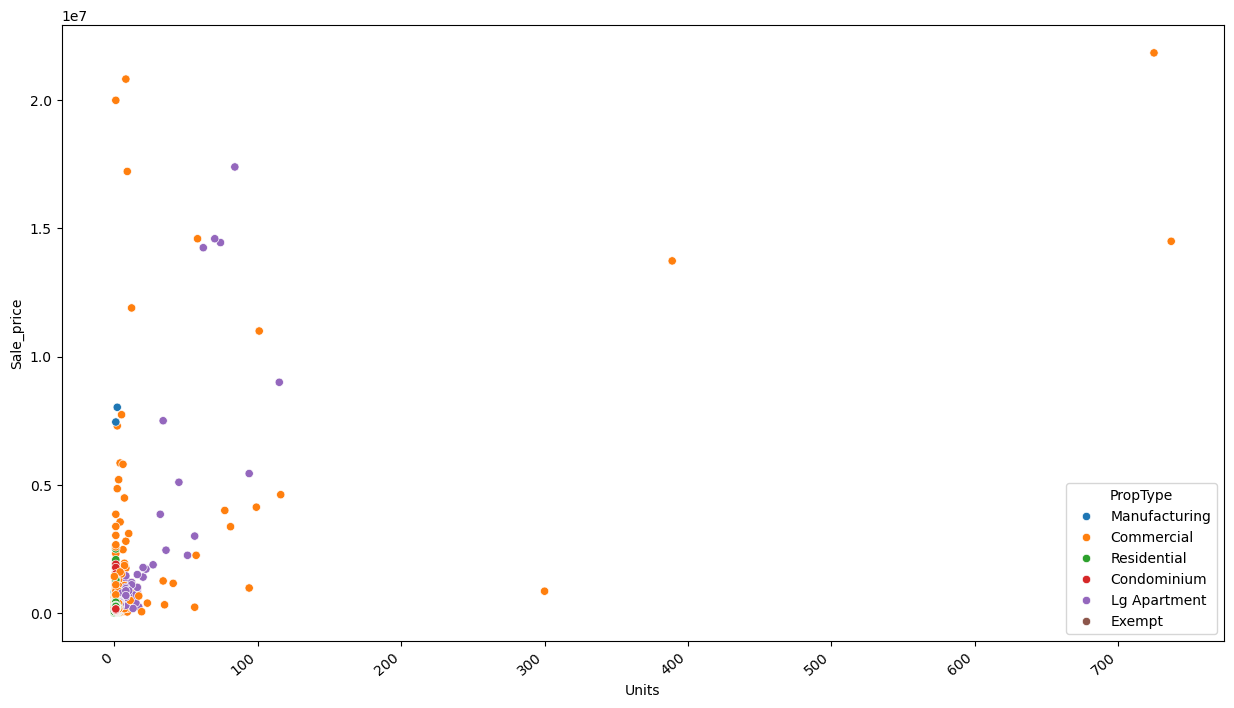

/var/folders/96/tqdv_j8d1td69fwj_dc4jwk80000gn/T/ipykernel_26023/3615557956.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


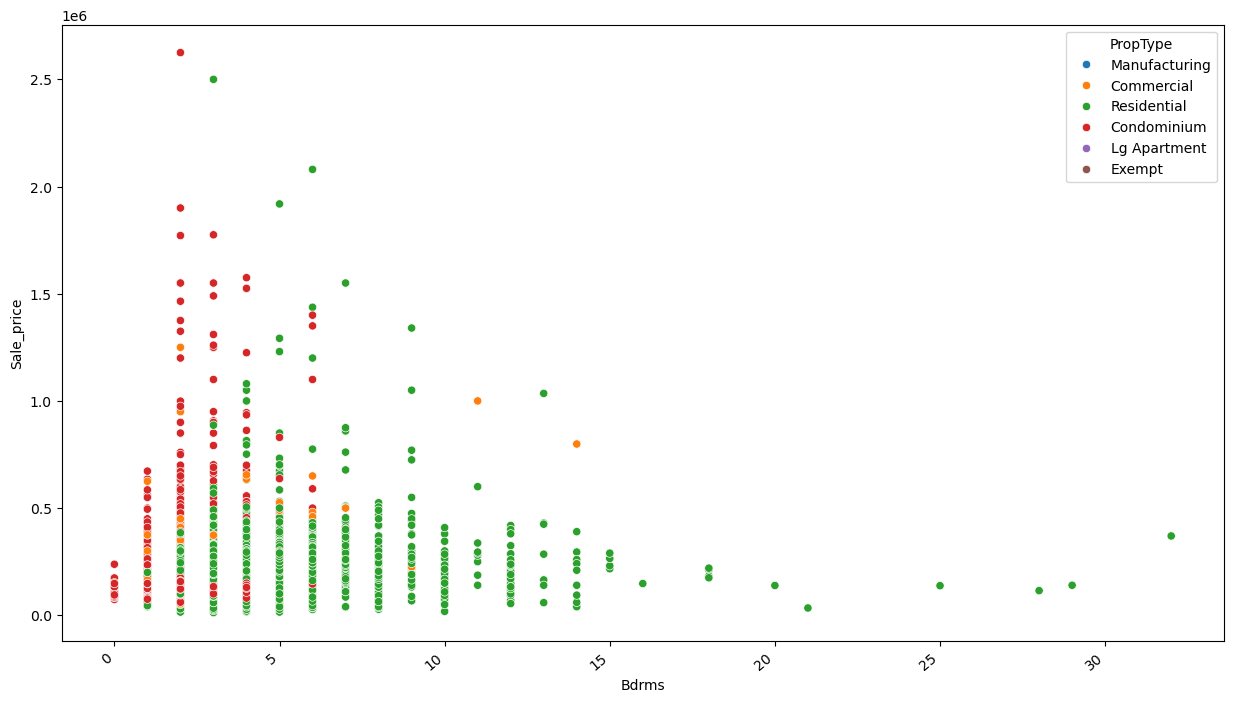

/var/folders/96/tqdv_j8d1td69fwj_dc4jwk80000gn/T/ipykernel_26023/3615557956.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


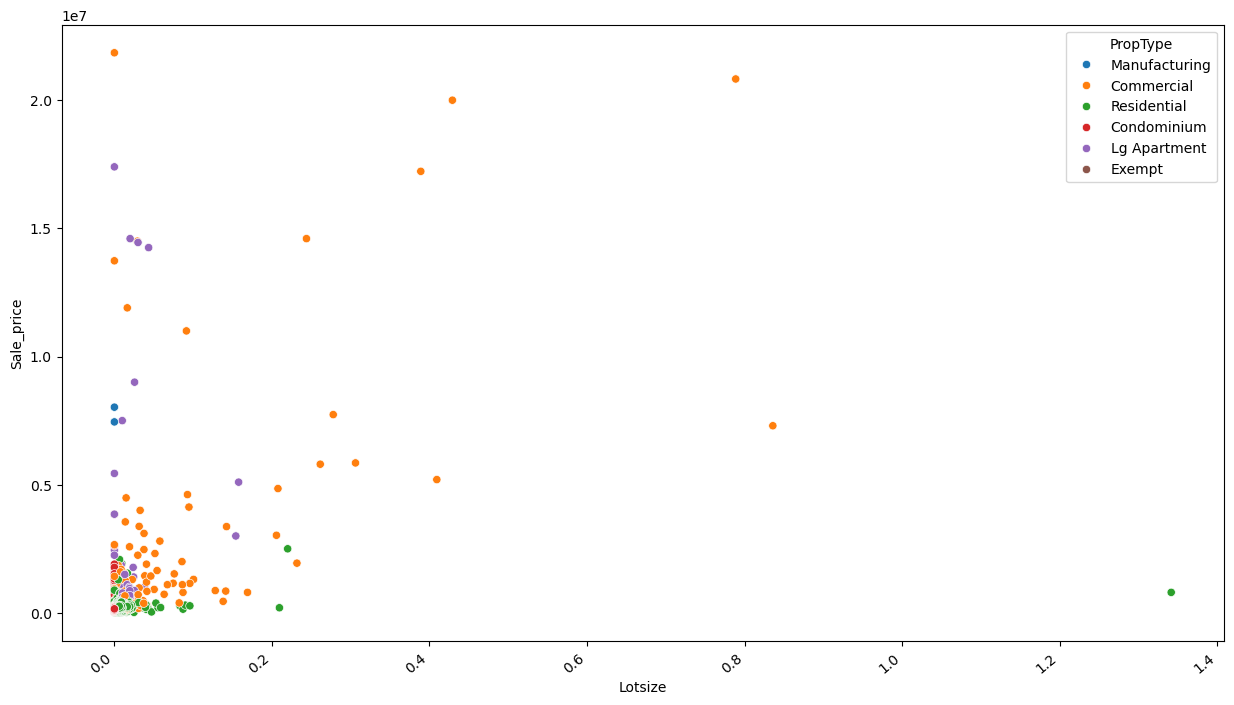

/var/folders/96/tqdv_j8d1td69fwj_dc4jwk80000gn/T/ipykernel_26023/3615557956.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


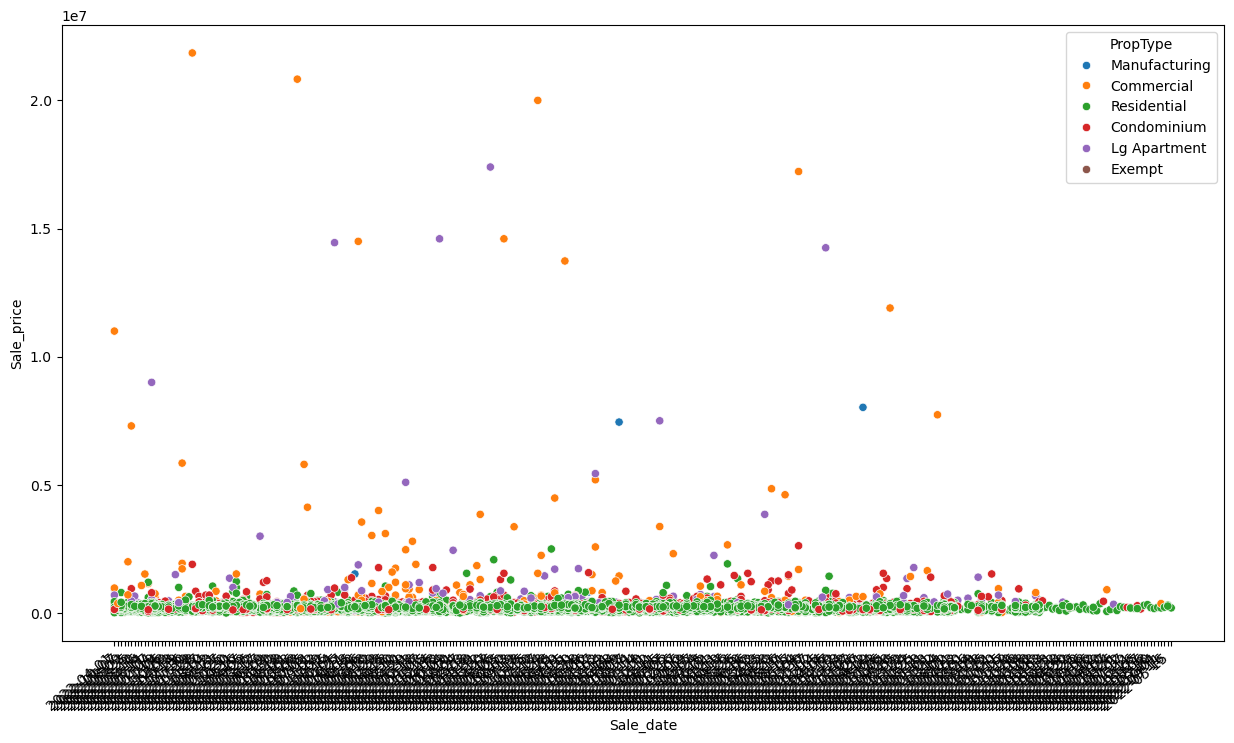

/var/folders/96/tqdv_j8d1td69fwj_dc4jwk80000gn/T/ipykernel_26023/3615557956.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


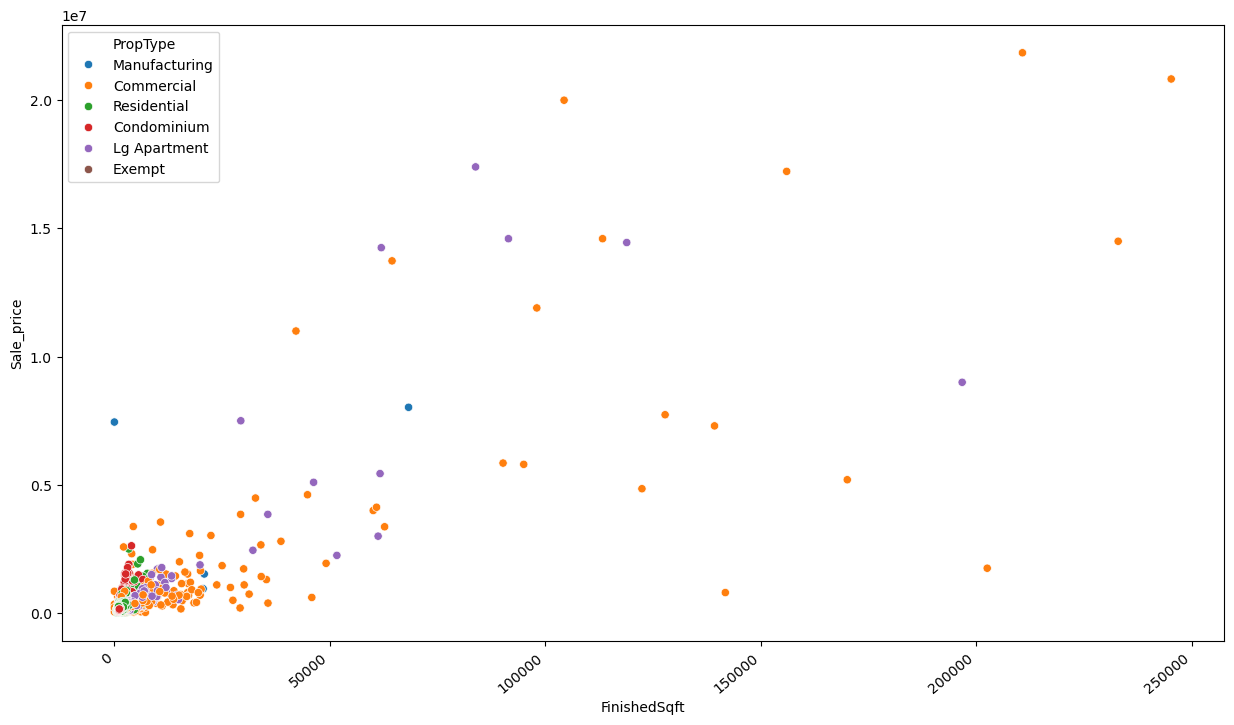

In [11]:
col_scatterplot = [
    "Extwall",
    "Year_Built",
    "Rooms",
    "Units",
    "Bdrms",
    "Lotsize",
    "Sale_date",
    "FinishedSqft",
]
for col in df[col_scatterplot]:
    plt.figure(figsize=(15, 8))
    ax = sns.scatterplot(
        x=col, y="Sale_price", data=df, color="b", hue="PropType"
    )  # Show as scatterplot, using PropType as categorical feature
    ax.set(xlabel=col, ylabel="Sale_price")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    plt.show()
# The variable style has to many different values, which does not really allow to have a proper plot for it.
# Also the variable Style has to many different values for a categorical variable, which indicates that it's maybe limited in supporting our model approach!


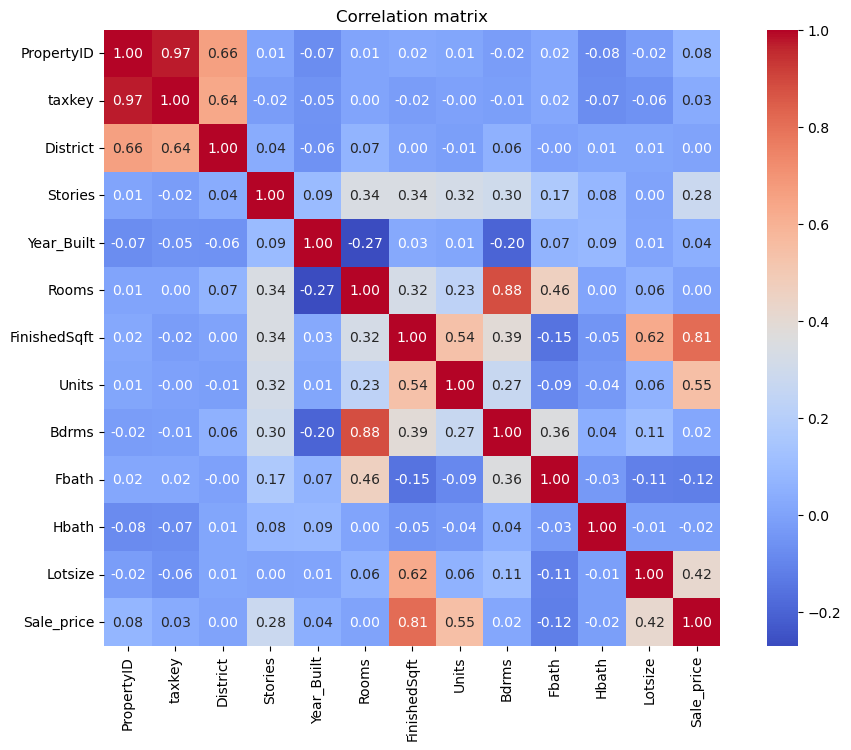

In [12]:
# Correlation matrix
df_corr = df.select_dtypes(include=["int64", "float64"]).corr()

plt.figure(figsize=(12, 8))
sns.heatmap(df_corr, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation matrix")
plt.show()


# Data Engineering

Explore Missing values: After data exploration, it's alreday clear that some variables ten dto have lots of nan values. For this variables we have to find a solution, such as imputing or very simple drop nan rows.

In [13]:
df = df[cols]
df.isna().sum() / len(df)
# It seems to be mainly affect three variables: Extwall, Rooms and Bedrooms. Using the imputation methods available, we could just inpute the mean, median etc. but for categorical variables this seems to be a bit tricky.
# Therefor we could use a classifier to predict the missing categorical variable by other features.
# We also don't know if just a certain subset of data is missing due to bad data quality etc.


District        0.000000
PropType        0.000000
Style           0.002939
nbhd            0.000000
FinishedSqft    0.003359
Fbath           0.000000
Hbath           0.000000
Extwall         0.129583
Year_Built      0.001539
Rooms           0.061993
Units           0.000000
Bdrms           0.061993
Lotsize         0.000000
Sale_date       0.000000
Sale_price      0.000000
Stories         0.005458
dtype: float64

<Axes: >

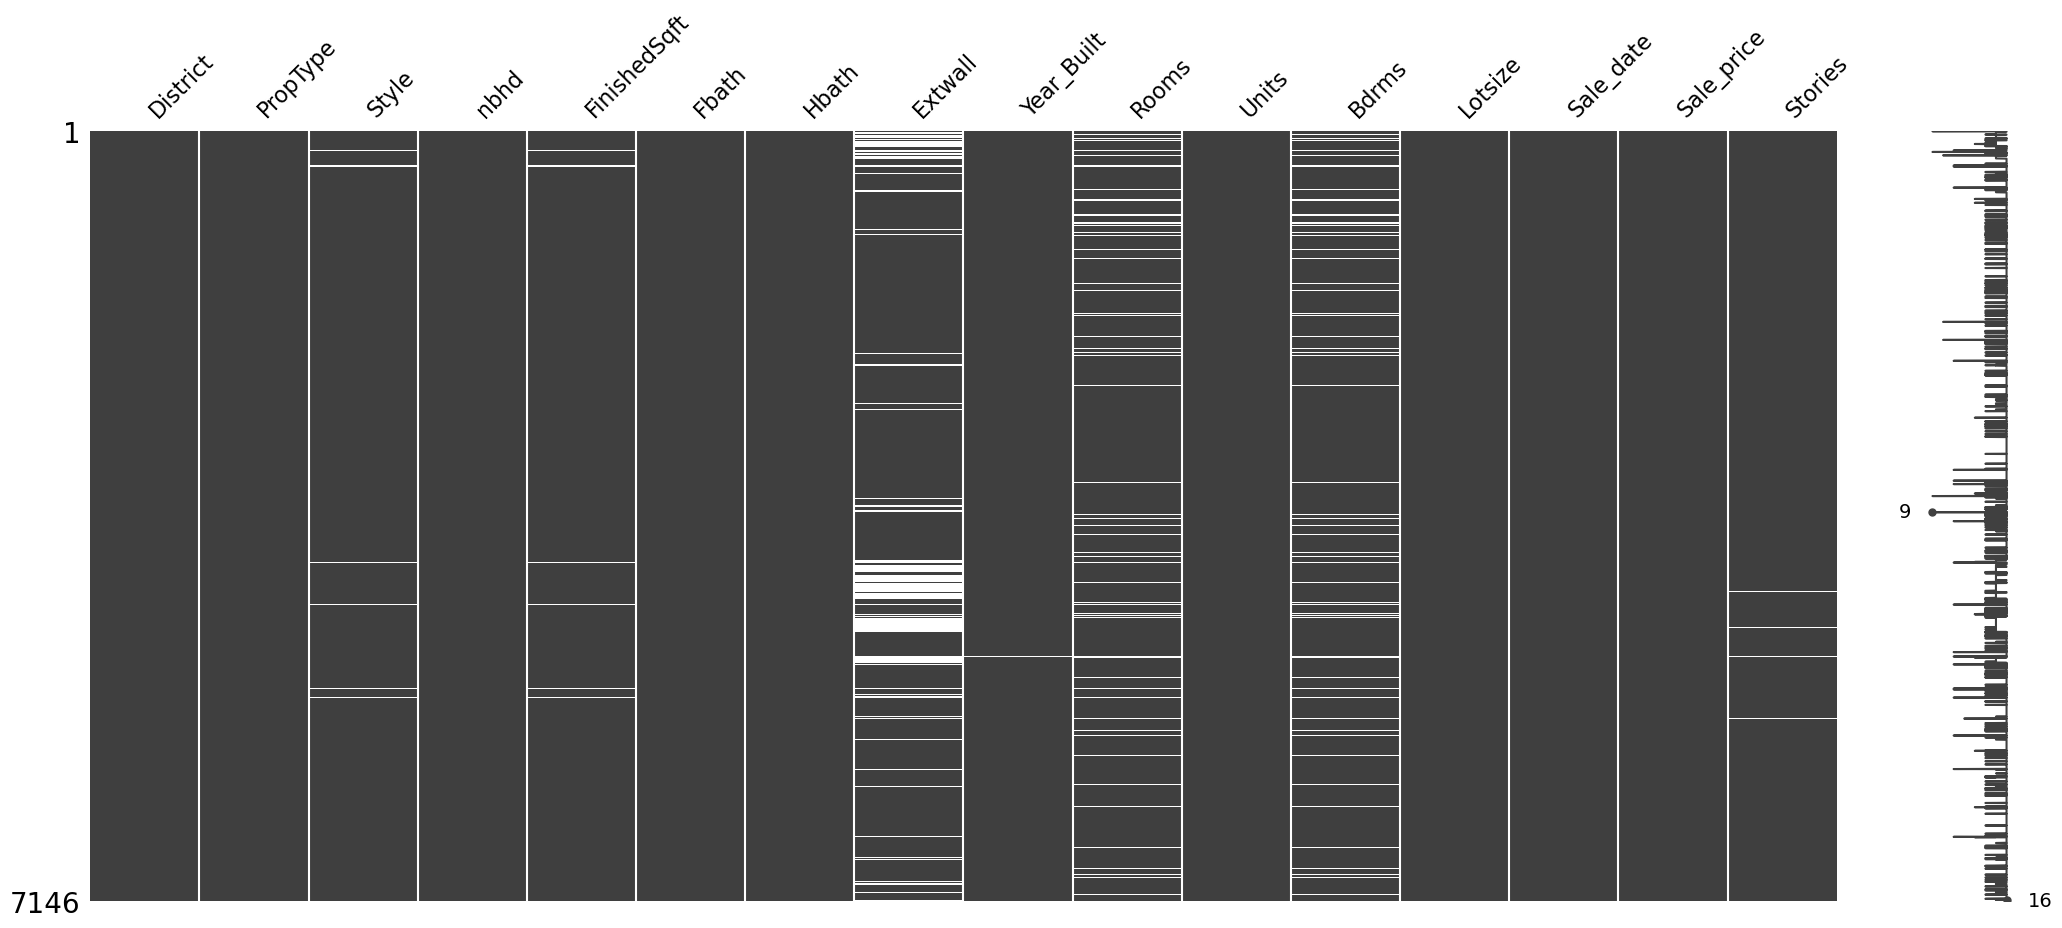

In [14]:
msno.matrix(df)  # Check on graphical view of systemtical missing data issues


<Axes: >

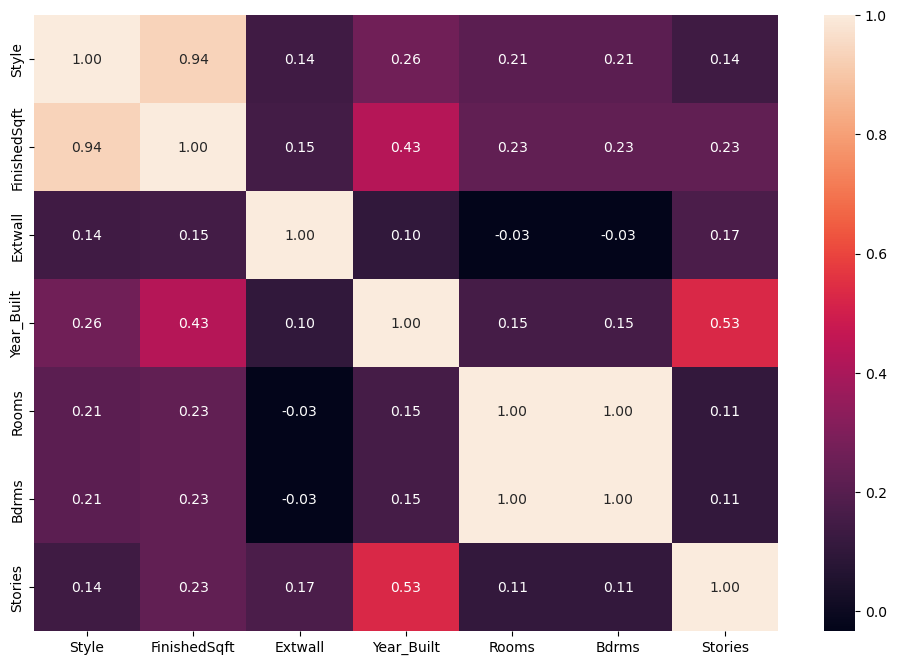

In [15]:
plt.figure(figsize=(12, 8))  # Check on nullity of correlation
sns.heatmap(df.loc[:, df.isnull().any()].isnull().corr(), annot=True, fmt=".2f")
# As we can see, there is no negative correlation, which indicates that a missing value for a certain variable does not imply a missing value for another.
# This techincally gives us a educated guess, if there are systematical correlations between missing values.


<Axes: >

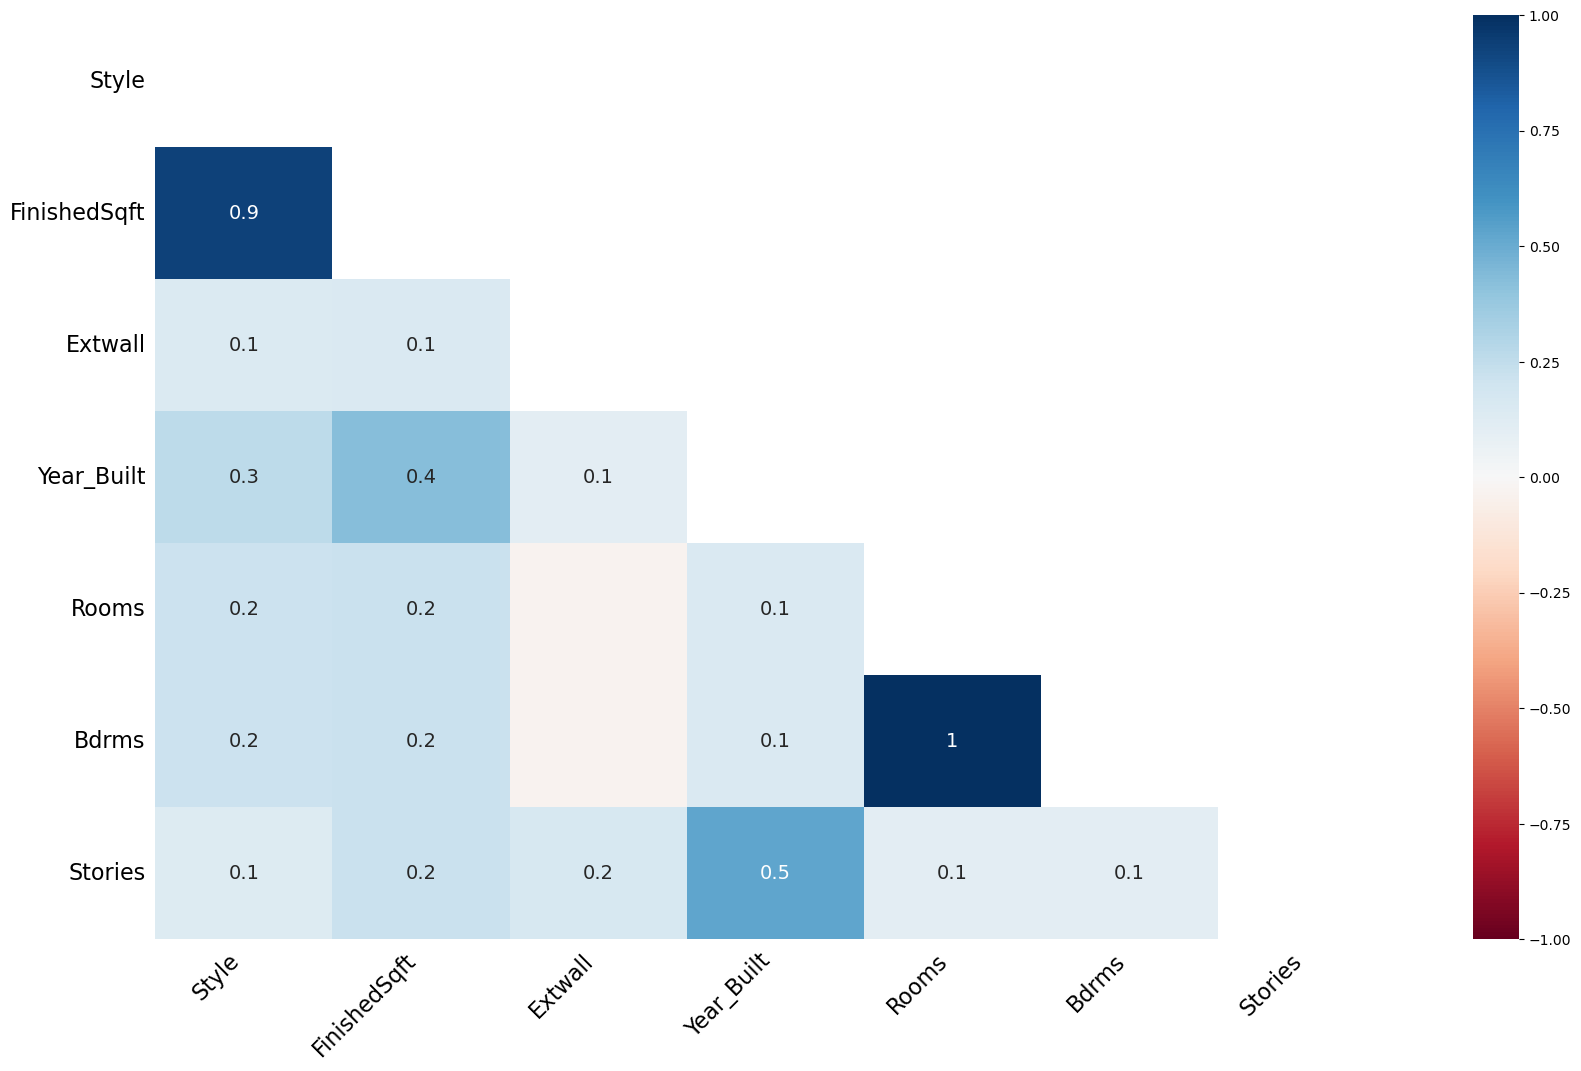

In [16]:
msno.heatmap(df)


<Axes: >

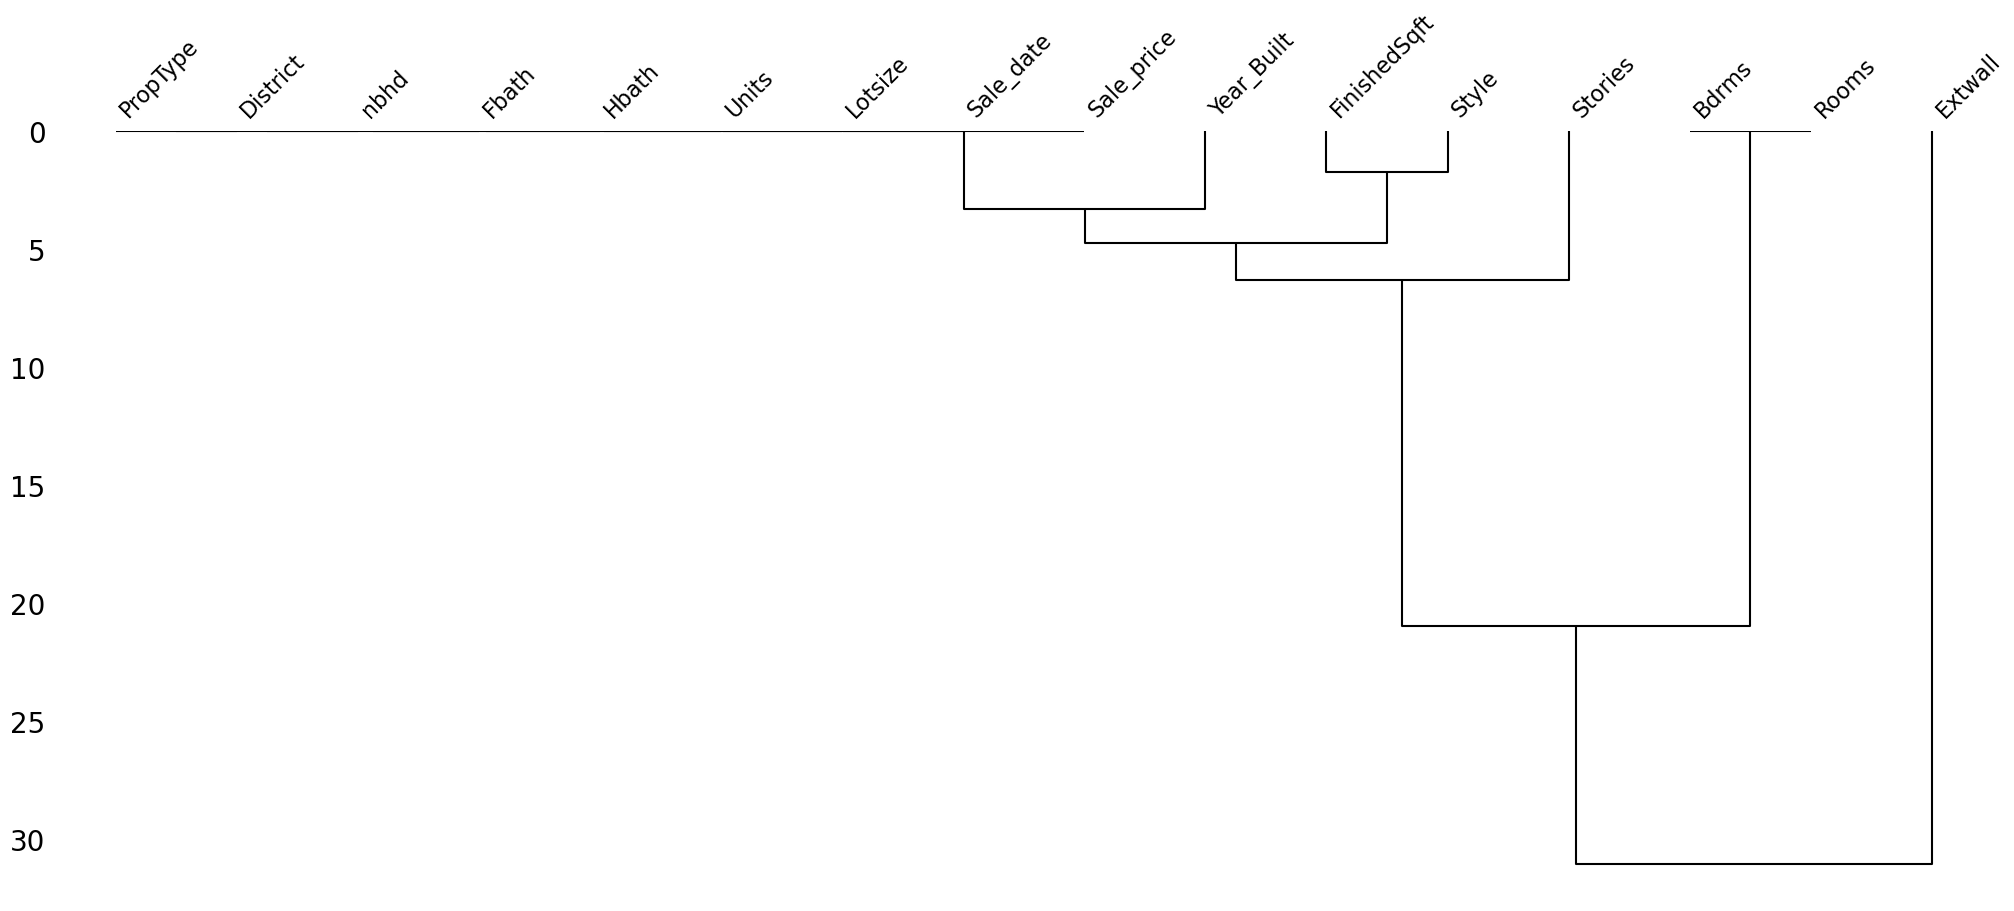

In [17]:
msno.dendrogram(df)
# We can see that Bedrooms and Rooms are always missing together, which makes sense ... if we don'z know how many rooms an appartment has, how should we know then how many bedrooms it has.
# We can also see, that if any information about the Rooms are missing and about the Style, that it's likely that the Extwall attribut is also not available.
# This leads us to the final clue, that Rooms and Bedrooms are Missing Data Not At Random (MNAR)
# Also Extrawall and Style seem to be Missing Data At Random (MAR), as they have some overlappings in being absent, same for Extrawall, Style, Rooms and Bedrooms all together
# Whereas Year_Built seems to be Missing Completely At Random (MCAR)
# See also: https://www.datacamp.com/tutorial/techniques-to-handle-missing-data-values


# Pipeline

## Base settings/ definitions

In [18]:
set_config(transform_output="pandas")


In [19]:
# Train test split, 30% test data, 70% train data, using random_state to allow resapling with same results
X_train, X_test, y_train, y_test = train_test_split(
    df.drop("Sale_price", axis=1), df["Sale_price"], test_size=0.3, random_state=0
)


In [20]:
# Define categorical and nummerical variables
cat_vars = ["Extwall", "PropType", "District", "nbhd", "Style"]
num_vars = [
    "Lotsize",
    "Rooms",
    "Bdrms",
    "Fbath",
    "Hbath",
    "FinishedSqft",
    "Units",
    "Stories",
]


## Build Pipeline

Pre Processing steps

In [255]:
# Create the first pipeline with different steps for nummerical and categorical variables
pipe_num = Pipeline(
    [
        ("num_imp", SimpleImputer(strategy="most_frequent", add_indicator=False)),
        ("rob_num", RobustScaler(with_centering=True)),
    ]
)

pipe_cat = Pipeline(
    [
        (
            "cat_imp",
            SimpleImputer(
                strategy="constant", add_indicator=False, fill_value="missing"
            ),
        ),
        ("ohe_cat", OneHotEncoder(sparse=False, handle_unknown="ignore")),
    ]
)


In [256]:
# Use column transformer to allow different operations on different columns, such as using different steps for categorical and nummerical variables
# Setting "passthrough" allows to skip columns, which are not mentioned
ct = ColumnTransformer(
    [
        ("missing_vals", MissingIndicator(), X_train.columns),
        ("pipe_num", pipe_num, num_vars),
        ("pipe_cat", pipe_cat, cat_vars),
    ],
    remainder="passthrough",
)


In [257]:
ct


ColumnTransformer(remainder='passthrough',
                  transformers=[('missing_vals', MissingIndicator(),
                                 Index(['District', 'PropType', 'Style', 'nbhd', 'FinishedSqft', 'Fbath',
       'Hbath', 'Extwall', 'Year_Built', 'Rooms', 'Units', 'Bdrms', 'Lotsize',
       'Sale_date', 'Stories'],
      dtype='object')),
                                ('pipe_num',
                                 Pipeline(steps=[('num_imp',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('rob_num', RobustScaler())]),
                                 ['Lotsize', 'Rooms', 'Bdrms', 'Fbath', 'Hbath',
                                  'FinishedSqft', 'Units', 'Stories']),
                                ('pipe_cat',
                                 Pipeline(steps=[('cat_imp',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('ohe_cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['Extwall', 'PropType', 'District', 'nbhd',
                                  'Style'])])

In [258]:
# Adding PCA to column transformer and apply only for the new columns added by one hot encoder

# ct_pca = ColumnTransformer(
#    remainder="passtrough",
#    transformers=[("pca", PCA(), indices)],
# )
# # All columns with OHE start with letter pipe_cat, so only this columns are affected


In [259]:
# Add pre pipe
# pre_pipe = Pipeline([("pre", ct), ("pca", ct_pca)])


Adding PCA & Model

In [260]:
pre_pipe = Pipeline([("pre", ct), ("pca", PCA())])


In [261]:
# Merge all pipes and column transformer
pipe_final = Pipeline([("pre", pre_pipe), ("model", RandomForestRegressor())])


In [262]:
# Check on the final picture of pipeline
pipe_final


Pipeline(steps=[('pre',
                 Pipeline(steps=[('pre',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('missing_vals',
                                                                   MissingIndicator(),
                                                                   Index(['District', 'PropType', 'Style', 'nbhd', 'FinishedSqft', 'Fbath',
       'Hbath', 'Extwall', 'Year_Built', 'Rooms', 'Units', 'Bdrms', 'Lotsize',
       'Sale_date', 'Stories'],
      dtype='object')),
                                                                  ('pipe_num',
                                                                   Pipeline(steps=[('num_imp',
                                                                                    Si...
                                                                                    RobustScaler())]),
                                                                   ['Lotsize',
                                                                    'Rooms',
                                                                    'Bdrms',
                                                                    'Fbath',
                                                                    'Hbath',
                                                                    'FinishedSqft',
                                                                    'Units',
                                                                    'Stories']),
                                                                  ('pipe_cat',
                                                                   Pipeline(steps=[('cat_imp',
                                                                                    SimpleImputer(fill_value='missing',
                                                                                                  strategy='constant')),
                                                                                   ('ohe_cat',
                                                                                    OneHotEncoder(handle_unknown='ignore',
                                                                                                  sparse=False))]),
                                                                   ['Extwall',
                                                                    'PropType',
                                                                    'District',
                                                                    'nbhd',
                                                                    'Style'])])),
                                 ('pca', PCA())])),
                ('model', RandomForestRegressor())])

Final Pipeline

In [263]:
# Fit the pipeline without any hyperparameter tuning
pipe_final.fit(X_train, y_train)


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



Pipeline(steps=[('pre',
                 Pipeline(steps=[('pre',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('missing_vals',
                                                                   MissingIndicator(),
                                                                   Index(['District', 'PropType', 'Style', 'nbhd', 'FinishedSqft', 'Fbath',
       'Hbath', 'Extwall', 'Year_Built', 'Rooms', 'Units', 'Bdrms', 'Lotsize',
       'Sale_date', 'Stories'],
      dtype='object')),
                                                                  ('pipe_num',
                                                                   Pipeline(steps=[('num_imp',
                                                                                    Si...
                                                                                    RobustScaler())]),
                                                                   ['Lotsize',
                                                                    'Rooms',
                                                                    'Bdrms',
                                                                    'Fbath',
                                                                    'Hbath',
                                                                    'FinishedSqft',
                                                                    'Units',
                                                                    'Stories']),
                                                                  ('pipe_cat',
                                                                   Pipeline(steps=[('cat_imp',
                                                                                    SimpleImputer(fill_value='missing',
                                                                                                  strategy='constant')),
                                                                                   ('ohe_cat',
                                                                                    OneHotEncoder(handle_unknown='ignore',
                                                                                                  sparse=False))]),
                                                                   ['Extwall',
                                                                    'PropType',
                                                                    'District',
                                                                    'nbhd',
                                                                    'Style'])])),
                                 ('pca', PCA())])),
                ('model', RandomForestRegressor())])

In [264]:
# Predict X_test
pipe_final.predict(X_test)


array([730184.27      ,  63125.        , 203954.16666667, ...,
       154707.        , 186377.        , 352632.5       ])

In [265]:
# Check on the score
print(pipe_final.score(X_train, y_train))
print(pipe_final.score(X_test, y_test))
print(
    "Train-Test loss of pipeline: "
    + str(pipe_final.score(X_train, y_train) - pipe_final.score(X_test, y_test))
)


0.9286991109895766
0.7731085311675302
Train-Test loss of pipeline: 0.15559057982204638


In [266]:
# Get all steps of pipeline contrsuct as string
pipe_final.named_steps


{'pre': Pipeline(steps=[('pre',
                  ColumnTransformer(remainder='passthrough',
                                    transformers=[('missing_vals',
                                                   MissingIndicator(),
                                                   Index(['District', 'PropType', 'Style', 'nbhd', 'FinishedSqft', 'Fbath',
        'Hbath', 'Extwall', 'Year_Built', 'Rooms', 'Units', 'Bdrms', 'Lotsize',
        'Sale_date', 'Stories'],
       dtype='object')),
                                                  ('pipe_num',
                                                   Pipeline(steps=[('num_imp',
                                                                    SimpleImputer(strategy='most_frequent')),
                                                                   ('rob_num',
                                                                    RobustScaler())]),
                                                   ['Lotsize', 'Rooms', 'Bdrms',
        

Using GridSearchCV

In [267]:
##Define all params for GridSearchCV to find best nodel approach

param_grid = [
    {
        "model": [
            
            RandomForestRegressor()
        ],
        "pre__pca__n_components": [0.8, 0.9, 0.95],
        "model__n_estimators": [50, 100, 200, 300, 500],
        "model__max_depth": [None,5, 10, 20],
        "model__min_samples_split": [5, 10, 15],
        "model__min_samples_leaf": [1, 5, 15],
        "model__max_features": ["log2"],
        "model__bootstrap": [True, False],
        "model__criterion": ["squared_error"],
        "model__random_state": [42],
    },
   
    {"model": [LinearRegression()]},
]


 {
        "model": [GradientBoostingRegressor()],
        "pca__n_components": [0.8, 0.9, 0.95],
        "model__learning_rate": [0.01, 0.05, 0.1],
        "model__n_estimators": [100, 500, 1000],
        "model__max_depth": [3, 5, 7],
        "model__subsample": [0.5, 0.75, 1.0],
        "model__min_samples_split": [2, 5, 10],
        "model__min_samples_leaf": [1, 2, 4],
        "model__max_features": ["auto", "sqrt", "log2"],
        "model__random_state": [42],
    },

In [268]:
# Define all params for GridSearchCV to find best nodel approach
grid_search = GridSearchCV(
    pipe_final,
    param_grid,
    verbose=2,
    cv=4,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1,
    return_train_score=True
)


In [269]:
# Fit the model with GridSearchCV
grid_search.fit(X_train, y_train)


Fitting 4 folds for each of 1081 candidates, totalling 4324 fits


/Users/lukask/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/lukask/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/lukask/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/lukask/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/lukask/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas re

[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, 

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=Non

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=Non

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   3.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   3.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   3.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   3.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   3.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   3.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   3.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   5.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   5.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   5.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   5.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   5.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   4.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   4.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   4.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   0.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   0.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   0.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   0.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   0.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   0.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   0.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   4.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   0.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   0.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   4.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   4.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   4.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   1.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   1.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   1.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   3.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   3.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   3.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   3.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   4.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   4.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   4.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   4.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   4.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   4.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   4.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   4.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   0.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   0.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   0.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   0.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   0.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   0.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   0.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   4.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   4.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   0.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   4.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   4.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   3.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   3.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   3.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   3.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   3.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   3.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   3.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   0.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   4.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   0.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   0.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   0.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   0.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   3.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   0.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   0.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=Non

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   0.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   3.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   4.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   3.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   0.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   0.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   1.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   1.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   1.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   1.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   1.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   1.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   1.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   1.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   3.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   3.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   3.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   3.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   3.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   3.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   3.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   3.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   0.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   0.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   0.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   0.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   0.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   0.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   0.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   3.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   3.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   3.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   3.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   0.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_dep

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   1.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   1.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   1.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   1.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   1.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   1.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   1.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   1.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   3.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   3.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   3.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   3.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   3.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   3.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   3.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   3.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   0.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   0.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   0.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   0.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   0.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   0.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   0.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   0.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   3.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   3.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   3.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   0.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   3.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   1.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   1.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   1.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   1.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   1.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   1.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   1.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   1.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   3.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   3.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   3.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   3.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   3.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   3.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   3.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   0.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   3.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   0.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   0.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   0.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   0.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   3.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   0.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   0.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   0.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   0.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   3.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   3.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   4.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_dep

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   0.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   1.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   1.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   1.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   1.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   1.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   1.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   1.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   1.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   1.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   2.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   3.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   3.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   2.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   3.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   3.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   3.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   3.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   0.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   0.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   0.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   0.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   0.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   3.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   3.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   3.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   3.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_dept

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   0.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   1.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   1.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   1.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   1.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   1.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   1.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   1.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   2.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   2.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   2.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   3.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   3.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   2.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   3.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   3.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   0.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   0.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   0.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   0.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   0.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   3.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   0.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   0.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   0.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   2.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   2.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   0.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   0.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   3.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   0.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_de

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   0.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   1.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   1.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   1.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   1.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   1.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   1.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   1.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   1.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   1.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_dep

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   1.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   1.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   2.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   3.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   2.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_dep

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   2.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   2.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   3.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   3.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   0.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   0.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   0.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   0.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   0.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   0.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   0.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   0.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   3.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   3.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   0.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   3.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   0.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   0.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, mod

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   0.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   0.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   0.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   0.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__ma

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   0.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   0.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   0.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   0.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   0.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   1.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   1.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   1.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   1.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   1.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   1.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   1.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   1.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   1.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   1.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   1.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   1.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   1.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   1.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   1.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   1.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   1.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   1.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   1.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   1.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   1.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   1.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   1.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   0.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   0.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   0.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   0.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   1.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   0.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   1.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   1.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   0.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   0.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   0.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__ma

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   0.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   0.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   0.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   0.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   0.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   0.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   0.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model_

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   0.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   0.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   1.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   1.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   1.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   1.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   1.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   1.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   1.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   1.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   1.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   1.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   1.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   1.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   1.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   1.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   1.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   2.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   2.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   2.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   2.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   2.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   2.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   2.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   2.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   0.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   0.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   0.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   2.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   0.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   0.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   2.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   2.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   0.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   0.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   0.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__ma

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   0.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   0.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   0.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   0.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   0.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   1.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   1.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   1.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   1.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   1.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   1.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   1.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   1.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   1.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   1.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   1.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   1.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   1.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   1.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   1.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   1.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   1.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   1.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   1.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   2.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   2.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   2.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   0.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   0.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   2.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   1.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   0.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   1.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   0.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   1.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   0.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   2.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   0.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   0.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   0.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   0.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   0.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   0.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   0.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__ma

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   1.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   1.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   1.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   1.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   1.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   1.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   1.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   1.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   1.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   1.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   1.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   1.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   2.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   1.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   1.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   1.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   2.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   2.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   2.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   0.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   0.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   0.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   1.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   0.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   0.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   0.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   2.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   0.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__m

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   0.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   0.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   0.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   0.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   0.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   0.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   0.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model_

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   1.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   1.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   1.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   1.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   1.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   1.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   1.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   1.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   1.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   1.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   1.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   1.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   1.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   1.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   1.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   1.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   1.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   1.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   1.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   1.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   1.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   1.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   1.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   1.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   2.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   0.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   1.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   0.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   0.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   0.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   1.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   0.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   0.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   0.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   2.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   2.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   0.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   0.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   0.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   0.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   0.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   0.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, mode

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   1.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   1.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   1.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   1.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   1.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   1.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   1.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   1.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   1.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   1.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   1.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   1.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   1.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   1.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   1.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   1.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   1.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   2.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   1.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   1.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   1.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   2.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   1.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   0.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   0.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   0.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   0.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   1.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   0.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   1.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   1.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   1.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   0.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   0.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   0.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   0.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   0.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   0.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   1.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   1.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   1.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model_

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   1.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   1.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   1.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   1.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   1.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model_

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   1.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   1.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   1.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model_

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   1.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   1.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   1.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   2.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   1.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   2.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   1.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   2.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   1.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   1.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   0.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   0.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   0.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   0.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   1.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   1.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   1.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   1.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   0.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   0.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   0.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   0.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   0.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   0.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   0.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   0.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   0.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   1.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   1.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   1.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   1.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   1.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   1.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   1.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   1.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   1.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   1.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   1.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   1.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, mod

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   1.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   1.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   1.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   1.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   2.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   2.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   2.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   2.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   2.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   1.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   2.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   2.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   0.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   0.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   0.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   0.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   2.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   2.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   2.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   0.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   2.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   0.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   0.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   0.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   0.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   1.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   1.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   1.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   1.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   1.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   1.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   1.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   1.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   1.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   1.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   1.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   1.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   1.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   1.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   1.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   1.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   1.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   2.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   2.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   2.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   2.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   2.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   2.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   2.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   2.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   0.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   0.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   2.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   0.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   2.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model_

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   0.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   2.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   0.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   0.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   0.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   1.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   1.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   1.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   1.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   1.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   3.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   3.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   3.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   3.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   3.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   3.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   3.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   0.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   3.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   0.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   0.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   0.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   3.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   3.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   0.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   0.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   3.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   3.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, mod

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, mo

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   1.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   1.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   1.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   1.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   1.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   1.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   1.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   1.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   1.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   1.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   1.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   2.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   2.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   2.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   2.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   2.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   2.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   2.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   3.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   0.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   0.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   0.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   0.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   2.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   0.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   0.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   2.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   2.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   2.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   0.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, mo

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   1.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   1.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   1.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   1.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   1.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   1.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   1.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   1.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   2.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   3.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   3.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   3.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   3.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   3.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   3.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, mo

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   3.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   0.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   3.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   3.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, mo

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   3.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   1.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   1.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   1.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   1.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   1.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   1.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   1.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   3.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   3.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   2.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   3.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   3.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   3.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   3.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   3.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   0.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   3.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   3.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   3.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, mod

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   1.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   1.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   1.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   1.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   1.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   1.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   3.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   3.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   3.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   3.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   3.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   3.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   3.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   3.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   0.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   0.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   0.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   3.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, mod

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   0.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   3.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   3.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   3.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, mo

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, mo

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   1.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   1.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   1.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, mo

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   1.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   1.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   1.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   1.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   3.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   3.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   3.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   3.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   3.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   3.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   3.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   3.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   0.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   0.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   0.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   0.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   3.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   3.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   3.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   3.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   1.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   1.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   1.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   1.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   1.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   1.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   1.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   1.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   1.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   3.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   3.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   3.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   3.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   3.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   3.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   3.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   3.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   0.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   0.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   0.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   3.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   3.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   3.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   3.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   1.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   1.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   1.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   1.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   3.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   3.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   3.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   3.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   3.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   3.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   3.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   3.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   0.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   0.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   3.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   3.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   3.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   1.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   1.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   1.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   1.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   1.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   1.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   1.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   1.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   3.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   3.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   3.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   3.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   3.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   3.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   3.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   3.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__m

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   0.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   3.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   3.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   2.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, mode

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   3.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   3.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   3.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   3.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   3.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   3.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   3.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   3.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   3.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   3.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   3.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   3.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   3.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   4.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   4.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   4.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   4.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   4.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   4.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   4.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   4.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   0.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   0.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   0.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   0.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   4.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   4.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   4.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   4.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, mo

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   3.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   3.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   3.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   4.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   4.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   4.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   4.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   4.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   4.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   4.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   4.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   4.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   4.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   4.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   5.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   2.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   2.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   2.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   2.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   2.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   2.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   2.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   2.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   3.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   3.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   3.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   3.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   3.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   3.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   3.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   3.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   3.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   4.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   4.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   4.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   4.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   4.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   4.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   0.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   4.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   4.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   0.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   4.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   4.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   4.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   4.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   3.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   3.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   3.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   3.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   3.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   3.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   3.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   4.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   3.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   4.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   4.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   4.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   4.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   4.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   4.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   4.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   4.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   0.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   0.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   4.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   4.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   4.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   4.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   2.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   2.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   2.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   2.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   2.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   2.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   2.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   3.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   3.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   3.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   3.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   3.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   3.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   3.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   3.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   3.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   3.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   4.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   5.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   5.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   5.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   6.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   6.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   5.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   5.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   5.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   5.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   5.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   4.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   4.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   5.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   5.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   5.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   5.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   5.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   4.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   4.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   5.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   5.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   5.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, mod

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   5.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   2.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   2.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   2.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   2.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   2.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   2.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   2.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   2.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   2.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   3.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   3.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   3.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   3.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   3.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   3.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   3.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   4.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   3.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   3.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   3.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   3.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   3.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   3.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   4.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   4.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   4.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   4.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   4.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   4.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   4.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, mo

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   4.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   4.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   5.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   5.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, mo

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, mo

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   2.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   2.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, mo

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   3.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   3.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   3.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   3.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   3.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   3.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   3.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   3.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   4.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   3.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   3.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   3.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   4.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   0.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   4.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   4.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   3.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   4.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   3.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   3.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   3.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   3.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   3.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   3.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   3.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   3.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   3.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   4.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   4.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   3.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   4.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   4.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   4.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   4.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   4.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   4.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   4.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   3.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   4.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   3.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   3.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   3.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   4.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   3.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   3.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   3.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   4.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   4.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   3.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   4.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   3.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   2.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   2.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   2.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   2.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   2.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   2.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   2.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   2.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   2.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   2.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   2.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   2.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   3.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   3.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   3.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   3.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   3.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   3.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   3.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   4.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   3.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   3.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   3.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   4.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   4.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   4.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   4.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   5.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   5.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   5.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   4.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   5.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   4.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   4.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   5.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   5.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   7.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   6.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   7.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   8.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   7.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   7.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   7.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   8.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   7.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   7.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   7.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   2.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   8.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   2.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   2.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   2.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_de

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   2.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   2.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   2.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   2.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   2.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   2.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   2.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   3.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   3.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   3.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   3.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   3.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   3.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   3.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   3.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   3.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   3.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   3.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   4.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   4.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   4.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   4.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   5.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   4.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   4.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   4.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   5.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   4.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   4.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   4.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   4.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   6.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   6.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   6.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   7.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   7.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   6.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   6.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   7.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   7.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   7.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   2.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   7.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   8.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   2.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   2.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   2.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   2.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   2.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   2.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   2.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   2.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   2.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   2.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   3.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   3.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   3.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   3.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   3.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   3.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   3.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   3.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   3.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   3.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   3.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   4.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   3.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   3.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   4.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   4.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   4.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   4.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   4.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   4.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   4.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   4.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   5.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   6.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   6.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   6.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   7.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   6.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   6.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   6.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   7.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   7.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   7.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   6.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   8.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   2.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   2.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   2.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   2.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   2.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   2.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   2.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   2.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   2.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   2.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   2.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   3.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   3.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   3.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   3.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   3.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   3.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   3.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   3.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   3.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   3.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   3.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   3.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   4.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   4.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   4.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   4.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   4.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   4.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   4.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   3.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   4.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   5.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   5.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   5.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   6.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   6.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   6.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   7.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   7.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   2.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   2.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   8.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   2.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   2.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   9.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   9.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=  10.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   2.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   2.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   2.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   3.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   3.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   2.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   2.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   2.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   2.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   2.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   2.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   2.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   2.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   2.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   2.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   3.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   3.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   3.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   4.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   3.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   4.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   4.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   4.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   4.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   3.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   3.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   4.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   4.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   4.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   4.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   5.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   5.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   4.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   4.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   5.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   5.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   4.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   5.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   5.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   7.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   6.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   6.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   7.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   6.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   6.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   6.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   7.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   6.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   7.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   6.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   8.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   2.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   2.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   2.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   2.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   2.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   2.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   2.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   2.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   2.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   2.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   2.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   2.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   3.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   3.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   3.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   3.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   3.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   3.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   3.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   3.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   3.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   3.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   3.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   3.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   4.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   4.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   4.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   4.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   4.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   4.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   4.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   4.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   4.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   4.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   4.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   5.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   5.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   5.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   6.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   6.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   5.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   6.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   6.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   6.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   6.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   6.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   6.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   2.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   2.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   3.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   3.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   3.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   3.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   3.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   3.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   3.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   3.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   4.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   3.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   3.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   3.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   4.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   5.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   4.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   4.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   5.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   5.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   5.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   5.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   5.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   5.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   5.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   5.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   5.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   2.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   2.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   2.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   3.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   3.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   3.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   3.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   3.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   3.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   3.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   4.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   3.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   3.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   4.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   3.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   5.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   4.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   5.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   5.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   5.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   5.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   5.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   5.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_d

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_de

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   5.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   5.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   5.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   5.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   2.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   2.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   2.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   2.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   2.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   3.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   3.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   3.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   3.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   3.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   3.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   3.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   3.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   3.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   3.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   3.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   3.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   3.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   3.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   4.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   5.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   5.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   5.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   5.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   5.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   5.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   5.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   0.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   6.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   0.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   5.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   0.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   5.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   5.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   6.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   1.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   1.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   1.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   1.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   1.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   1.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   1.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   2.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   3.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   3.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   3.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   2.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   3.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   2.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   2.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   0.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   3.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, mode

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, mo

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   2.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, mo

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, mo

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5,

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   3.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   3.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   3.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   3.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   3.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   3.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   3.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   3.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   3.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   3.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   3.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, mod

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, mo

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5,

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, mo

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   3.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   3.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   3.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   3.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   3.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   4.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   3.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   4.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   3.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   3.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, mo

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   3.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   3.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   1.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   1.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   1.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   1.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   1.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   1.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   1.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   3.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   3.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   3.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   3.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   3.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   3.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   3.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   3.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   0.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   3.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   3.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   3.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, mod

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, m

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   3.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   3.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   3.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   3.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   3.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   3.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   3.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   3.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   3.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   3.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   3.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   3.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, m

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   3.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   2.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   2.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   2.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   2.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   3.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   3.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   3.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   3.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   3.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   3.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   3.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   3.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   3.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   3.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   4.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   3.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   2.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   2.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, mo

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5,

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, mo

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   1.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   3.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   3.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   3.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   3.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   3.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   3.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   3.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   3.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   3.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   3.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   3.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   3.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   1.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   3.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   3.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   3.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   3.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   3.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   3.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   3.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   3.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   3.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   4.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   3.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   3.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5,

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5,

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5,

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   3.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   3.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   3.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5,

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   3.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   3.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   3.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   3.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   3.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   3.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   3.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=5, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   3.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   2.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   3.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   3.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   3.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   3.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   3.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   3.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   3.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   3.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   3.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   3.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   3.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   3.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   4.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   4.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   4.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   4.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   4.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   4.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   4.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   4.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   4.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   5.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   4.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   5.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   2.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   2.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   2.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   2.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   2.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   2.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   2.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   2.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   2.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   2.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   3.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   3.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   3.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   3.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   3.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   3.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   3.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   3.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   3.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   3.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   3.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   3.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   4.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   4.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   4.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   4.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   4.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   4.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   4.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   4.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   4.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   4.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   4.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   4.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   3.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   3.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   3.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   3.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   3.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   3.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   3.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   3.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   3.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   3.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   4.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   4.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   5.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   5.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   5.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   5.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   4.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   5.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   4.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   5.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   4.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   5.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   5.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   2.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   2.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   2.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   2.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   2.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   2.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   2.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, m

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   2.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   2.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, m

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   3.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   3.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   3.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   3.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   3.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   3.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, m

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   3.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   3.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   3.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   3.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   5.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   4.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   5.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   5.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   4.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   4.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   4.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   4.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   5.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   5.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   5.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   3.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   3.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   3.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   3.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   3.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   3.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   3.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   3.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   3.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   3.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   3.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   3.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   5.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   5.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   5.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   4.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   5.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   5.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   5.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   5.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   6.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   6.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=1

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   6.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   2.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   2.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   2.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   2.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   3.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   3.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   3.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   2.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   3.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   3.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   2.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   2.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   2.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   2.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   2.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   2.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   3.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   3.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   3.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   3.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   3.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   3.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   3.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   3.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   3.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   3.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   3.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   3.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   3.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   3.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   3.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   3.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   3.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   4.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   4.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   4.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   4.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   4.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   4.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   4.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   4.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, m

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, m

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   4.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   4.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   4.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   4.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   3.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   2.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   3.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   3.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   2.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   3.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   3.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   3.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   3.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   3.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   4.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   4.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   4.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   4.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   4.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   4.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   4.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   4.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   4.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   4.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   4.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   4.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   2.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   2.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   2.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   2.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   2.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   2.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   2.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_de

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   3.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   3.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   3.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   3.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   3.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   3.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   3.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   3.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   3.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   3.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   3.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   3.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   3.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   3.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   4.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   4.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   4.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   4.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   4.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   4.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   4.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   4.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   5.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   5.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   5.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   5.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   2.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   2.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   2.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   2.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   2.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   2.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   2.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   2.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   2.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   2.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   2.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   3.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   3.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   3.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   3.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   3.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   3.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   3.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   3.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   2.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   3.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   3.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   3.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   4.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   4.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   4.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   4.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   4.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   4.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   4.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   4.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   4.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   4.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   4.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   4.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   2.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   2.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   2.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   2.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   2.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   2.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   2.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   2.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   2.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   2.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   2.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   2.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   3.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   3.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   3.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   3.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   3.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   3.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   3.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   3.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   3.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   3.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   3.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   3.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   4.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   4.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   4.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   4.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   4.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   4.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   4.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   4.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   5.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   5.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   5.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   5.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   7.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   6.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   6.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   7.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   6.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   6.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   6.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   7.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   7.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   7.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   7.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   7.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   2.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   2.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   2.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   2.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   2.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   2.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   2.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   2.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   2.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   2.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   2.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   2.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   3.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   3.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   3.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   3.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   3.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   3.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   3.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   3.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   3.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   3.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   3.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   3.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   4.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   4.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   4.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   5.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   6.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   6.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   6.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   6.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   6.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   5.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   5.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   5.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   7.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   6.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   6.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   7.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   7.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   6.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   7.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   6.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   7.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   7.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=2

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   7.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   7.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   2.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   2.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   2.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   2.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   3.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   3.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   3.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   3.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   4.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   4.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   4.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   4.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   5.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   5.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   5.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   5.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   4.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   4.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   3.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   4.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   3.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   3.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   3.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   4.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   4.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   4.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   4.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   4.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   4.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   4.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   4.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   4.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   4.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   4.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   4.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   4.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   6.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   6.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   6.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   6.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   6.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   6.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   6.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   7.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   7.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   7.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   6.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   7.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   2.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   2.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   2.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   2.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   2.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   2.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   2.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   2.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   2.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   2.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   2.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   2.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   2.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   3.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   3.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   3.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   3.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   3.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   3.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   4.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   3.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   3.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   3.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   3.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   3.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   4.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   4.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   4.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   4.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   4.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   4.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   4.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   4.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   4.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   4.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   4.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   4.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   5.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   6.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   6.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   6.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   6.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   6.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   6.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   6.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   6.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   6.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   7.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   6.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   2.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   2.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   2.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   2.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   2.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   2.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   2.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   2.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   2.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   2.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   2.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   2.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   3.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   3.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   4.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   3.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   3.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   4.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   3.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   4.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   3.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   4.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   3.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   4.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   5.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   5.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   5.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   5.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   5.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   5.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   5.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   6.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   4.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   5.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   5.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   5.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   6.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   6.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   6.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   6.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   6.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   6.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   6.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   6.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   6.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   6.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   6.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   6.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   2.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   2.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   2.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   2.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   2.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   2.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   2.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   2.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   2.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   2.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   2.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   2.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   3.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   3.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   3.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   3.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   3.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   3.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   3.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   3.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   3.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   3.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   3.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   3.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   3.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   3.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   3.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   4.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   4.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   3.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   3.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   4.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   5.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   5.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   5.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   5.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   5.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   5.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   5.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   6.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   6.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   6.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   6.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=5, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   5.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   3.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   3.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   3.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   3.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   3.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   3.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   3.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   3.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   3.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   3.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   3.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   3.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   4.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   4.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   5.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   5.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   5.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   4.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   5.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   5.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   5.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   5.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   5.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=5, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   5.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   1.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   1.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   2.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   1.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   2.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   3.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   3.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   3.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   3.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   3.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   3.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   3.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   3.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   3.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   3.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   3.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   4.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   5.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   4.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   5.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   5.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   5.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   5.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   5.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   6.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.8; total time=   1.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   1.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   2.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   2.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.9; total time=   2.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   7.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   2.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   7.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   7.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=10, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   7.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=50, model__random_state=42, pre__pca__n_components=0.95; total time=   1.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   2.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   2.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   2.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.8; total time=   2.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   2.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   2.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.9; total time=   2.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   2.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   2.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   2.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=100, model__random_state=42, pre__pca__n_components=0.95; total time=   2.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   2.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.8; total time=   3.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   3.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   3.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.9; total time=   2.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=200, model__random_state=42, pre__pca__n_components=0.95; total time=   2.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   3.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   3.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   3.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.8; total time=   4.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   4.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   3.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   4.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.9; total time=   4.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   4.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   4.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   3.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=300, model__random_state=42, pre__pca__n_components=0.95; total time=   4.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   5.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   5.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   5.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.8; total time=   6.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   5.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   6.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   6.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.9; total time=   6.5s
[CV] END ...........................model=LinearRegression(); total time=   1.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END ...........................model=LinearRegression(); total time=   1.2s
[CV] END ...........................model=LinearRegression(); total time=   1.2s
[CV] END ...........................model=LinearRegression(); total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   5.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=15, model__min_samples_split=15, model__n_estimators=500, model__random_state=42, pre__pca__n_components=0.95; total time=   5.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_l

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('pre',
                                        Pipeline(steps=[('pre',
                                                         ColumnTransformer(remainder='passthrough',
                                                                           transformers=[('missing_vals',
                                                                                          MissingIndicator(),
                                                                                          Index(['District', 'PropType', 'Style', 'nbhd', 'FinishedSqft', 'Fbath',
       'Hbath', 'Extwall', 'Year_Built', 'Rooms', 'Units', 'Bdrms', 'Lotsize',
       'Sale_date', 'Stories'],
      dtype='object')),
                                                                                         ('pipe_num',
                                                                                          P...
                          'model__max_depth': [None, 5, 10, 20],
                          'model__max_features': ['log2'],
                          'model__min_samples_leaf': [1, 5, 15],
                          'model__min_samples_split': [5, 10, 15],
                          'model__n_estimators': [50, 100, 200, 300, 500],
                          'model__random_state': [42],
                          'pre__pca__n_components': [0.8, 0.9, 0.95]},
                         {'model': [LinearRegression()]}],
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=2)

In [270]:
# Access the best model and evaluate its performance
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_model_name = best_model.named_steps['model'].__class__.__name__
train_score = best_model.score(X_train, y_train)
test_score = best_model.score(X_test, y_test)
print(f"The best model selected by GridSearchCV is: {best_model_name}")
print(f"{best_model_name} train score: {train_score}")
print(f"{best_model_name} test score: {test_score}")
print(f"train test loss :"+ str(train_score-test_score))
print(f"best params are: {best_params}")


The best model selected by GridSearchCV is: RandomForestRegressor
RandomForestRegressor train score: 0.8254529899042082
RandomForestRegressor test score: 0.6792570304618872
train test loss :0.146195959442321
best params are: {'model': RandomForestRegressor(max_depth=20, max_features='log2', min_samples_split=5,
                      n_estimators=50, random_state=42), 'model__bootstrap': True, 'model__criterion': 'squared_error', 'model__max_depth': 20, 'model__max_features': 'log2', 'model__min_samples_leaf': 1, 'model__min_samples_split': 5, 'model__n_estimators': 50, 'model__random_state': 42, 'pre__pca__n_components': 0.8}


Evaluate Pipeline/ Model

In [271]:
pipe_final.set_params(**best_params)


Pipeline(steps=[('pre',
                 Pipeline(steps=[('pre',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('missing_vals',
                                                                   MissingIndicator(),
                                                                   Index(['District', 'PropType', 'Style', 'nbhd', 'FinishedSqft', 'Fbath',
       'Hbath', 'Extwall', 'Year_Built', 'Rooms', 'Units', 'Bdrms', 'Lotsize',
       'Sale_date', 'Stories'],
      dtype='object')),
                                                                  ('pipe_num',
                                                                   Pipeline(steps=[('num_imp',
                                                                                    Si...
                                                                   Pipeline(steps=[('cat_imp',
                                                                                    SimpleImputer(fill_value='missing',
                                                                                                  strategy='constant')),
                                                                                   ('ohe_cat',
                                                                                    OneHotEncoder(handle_unknown='ignore',
                                                                                                  sparse=False))]),
                                                                   ['Extwall',
                                                                    'PropType',
                                                                    'District',
                                                                    'nbhd',
                                                                    'Style'])])),
                                 ('pca', PCA(n_components=0.8))])),
                ('model',
                 RandomForestRegressor(max_depth=20, max_features='log2',
                                       min_samples_split=5, n_estimators=50,
                                       random_state=42))])

In [272]:
pipe_final.fit(X_train, y_train)


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



Pipeline(steps=[('pre',
                 Pipeline(steps=[('pre',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('missing_vals',
                                                                   MissingIndicator(),
                                                                   Index(['District', 'PropType', 'Style', 'nbhd', 'FinishedSqft', 'Fbath',
       'Hbath', 'Extwall', 'Year_Built', 'Rooms', 'Units', 'Bdrms', 'Lotsize',
       'Sale_date', 'Stories'],
      dtype='object')),
                                                                  ('pipe_num',
                                                                   Pipeline(steps=[('num_imp',
                                                                                    Si...
                                                                   Pipeline(steps=[('cat_imp',
                                                                                    SimpleImputer(fill_value='missing',
                                                                                                  strategy='constant')),
                                                                                   ('ohe_cat',
                                                                                    OneHotEncoder(handle_unknown='ignore',
                                                                                                  sparse=False))]),
                                                                   ['Extwall',
                                                                    'PropType',
                                                                    'District',
                                                                    'nbhd',
                                                                    'Style'])])),
                                 ('pca', PCA(n_components=0.8))])),
                ('model',
                 RandomForestRegressor(max_depth=20, max_features='log2',
                                       min_samples_split=5, n_estimators=50,
                                       random_state=42))])

In [273]:
# Check on in sample MAPE --> overfitting/ underfitting trade off
train_predictions = pipe_final.predict(X_train)
mape = mean_absolute_percentage_error(y_train, train_predictions) * 100
mse = mean_squared_error(y_train, train_predictions)
mae = mean_absolute_error(y_train, train_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, train_predictions)
print(f"{best_model_name} In-sample mape with {mape:.2f}%")
print(f"{best_model_name} In-sample mae with {mae:.2f}")
print(f"{best_model_name} In-sample mse with {mse:.2f}")
print(f"{best_model_name} In-sample rmse with {rmse:.2f}")    
print(f"{best_model_name} In-sample r2 with {r2:.2f}")



RandomForestRegressor In-sample mape with 33.59%
RandomForestRegressor In-sample mae with 70996.87
RandomForestRegressor In-sample mse with 93949072297.04
RandomForestRegressor In-sample rmse with 306511.13
RandomForestRegressor In-sample r2 with 0.83


In [274]:
# Check on in sample MAPE --> overfitting/ underfitting trade off
test_predictions = pipe_final.predict(X_test)
mape = mean_absolute_percentage_error(y_test, test_predictions) * 100
mse = mean_squared_error(y_test, test_predictions)
mae = mean_absolute_error(y_test, test_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, train_predictions)
print(f"{best_model_name} Out-of-sample mape with {mape:.2f}%")
print(f"{best_model_name} Out-of-sample mae with {mae:.2f}")
print(f"{best_model_name} Out-of-sample mse with {mse:.2f}")
print(f"{best_model_name} Out-of-sample rmse with {rmse:.2f}")    
print(f"{best_model_name} Out-of-sample r2 with {r2:.2f}")

# The model seems to be hardly overfitted, as ist has almost no error in train but >50% in test


RandomForestRegressor Out-of-sample mape with 51.22%
RandomForestRegressor Out-of-sample mae with 109279.55
RandomForestRegressor Out-of-sample mse with 231195071361.03
RandomForestRegressor Out-of-sample rmse with 480827.49
RandomForestRegressor Out-of-sample r2 with 0.83


Get features names

In [275]:
ohe_cols = pipe_final.named_steps['pre'].named_steps["pre"].named_transformers_["pipe_cat"]["ohe_cat"].get_feature_names_out()
ohe_cols


array(['Extwall_Alum/Vynyl Siding', 'Extwall_Aluminum/Vinyl',
       'Extwall_Asphalt/Other', 'Extwall_Block', 'Extwall_Brick',
       'Extwall_Brick on Block', 'Extwall_Brick on Frame',
       'Extwall_Concrete Block', 'Extwall_Fiber Cement/Hardiplank',
       'Extwall_Masonary Frame', 'Extwall_Masonry/Frame',
       'Extwall_Metal Siding', 'Extwall_Other',
       'Extwall_Precast Masonary', 'Extwall_Prem Wood', 'Extwall_Stone',
       'Extwall_Stucco', 'Extwall_Wood', 'Extwall_missing',
       'PropType_Commercial', 'PropType_Condominium', 'PropType_Exempt',
       'PropType_Lg Apartment', 'PropType_Manufacturing',
       'PropType_Residential', 'District_1', 'District_2', 'District_3',
       'District_4', 'District_5', 'District_6', 'District_7',
       'District_8', 'District_9', 'District_10', 'District_11',
       'District_12', 'District_13', 'District_14', 'District_15',
       'nbhd_1020', 'nbhd_1040', 'nbhd_1140', 'nbhd_1150', 'nbhd_1160',
       'nbhd_1200', 'nbhd_1220', 'n

# Next try

Rengineering of Pipeline

In [21]:
# Create the first pipeline with different steps for nummerical and categorical variables
pipe_num = Pipeline(
    [
        ("num_imp", SimpleImputer(strategy="most_frequent")),
        ("rob_num", RobustScaler(with_centering=True)),
    ]
)

pipe_cat = Pipeline(
    [
        (
            "cat_imp",
            SimpleImputer(
                strategy="most_frequent"
            ),
        ),
        ("ohe_cat", OneHotEncoder(sparse=False, handle_unknown="ignore")),
    ]
)


In [22]:
# Use column transformer to allow different operations on different columns, such as using different steps for categorical and nummerical variables
# Setting "passthrough" allows to skip columns, which are not mentioned
ct = ColumnTransformer(
    [
        ("pipe_num", pipe_num, num_vars),
        ("pipe_cat", pipe_cat, cat_vars),
    ],
    remainder="drop",
)


In [23]:
pipe_final = Pipeline([("pre", ct), ("model", RandomForestRegressor())])


In [24]:
# Trying another Regression approach
pipe_final


Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('num_imp',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('rob_num',
                                                                   RobustScaler())]),
                                                  ['Lotsize', 'Rooms', 'Bdrms',
                                                   'Fbath', 'Hbath',
                                                   'FinishedSqft', 'Units',
                                                   'Stories']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('cat_imp',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe_cat',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Extwall', 'PropType',
                                                   'District', 'nbhd',
                                                   'Style'])])),
                ('model', RandomForestRegressor())])

In [25]:
pipe_final.fit(X_train, y_train)


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('num_imp',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('rob_num',
                                                                   RobustScaler())]),
                                                  ['Lotsize', 'Rooms', 'Bdrms',
                                                   'Fbath', 'Hbath',
                                                   'FinishedSqft', 'Units',
                                                   'Stories']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('cat_imp',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe_cat',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Extwall', 'PropType',
                                                   'District', 'nbhd',
                                                   'Style'])])),
                ('model', RandomForestRegressor())])

In [227]:
##Define all params for GridSearchCV to find best nodel approach

param_grid = [
    {
        "model": [
            
            RandomForestRegressor()
        ],
        "model__n_estimators": [50, 100, 200],
        "model__max_depth": [None, 10, 20],
        "model__min_samples_split": [2, 10],
        "model__min_samples_leaf": [1, 4],
        "model__max_features": ["log2"],
        "model__bootstrap": [True, False],
        "model__criterion": ["squared_error"],
        "model__random_state": [42],
    },
   
    {"model": [LinearRegression()]},
]


In [228]:
# Define all params for GridSearchCV to find best nodel approach
grid_search = GridSearchCV(
    pipe_final,
    param_grid,
    verbose=2,
    cv=4,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1,
    return_train_score=True
)


In [229]:
# Fit the model with GridSearchCV
grid_search.fit(X_train, y_train)


Fitting 4 folds for each of 73 candidates, totalling 292 fits


/Users/lukask/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/lukask/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/lukask/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/lukask/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/lukask/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas re

[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=50, model__random_state=42; total time=   0.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=50, model__random_state=42; total time=   1.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=50, model__random_state=42; total time=   1.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=2, mod

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100, model__random_state=42; total time=   1.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100, model__random_state=42; total time=   1.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100, model__random_state=42; total time=   1.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100, model__random_state=42; total time=   2.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42; total time=   0.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42; total time=   0.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10,

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42; total time=   0.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42; total time=   0.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42; total time=   0.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42; total time=   1.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, model__random_state=42; total time=   4.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, model__random_state=42; total time=   3.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42; total time=   1.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=50, model__random_state=42; total time=   0.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42; total time=   1.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=50, model__random_state=42; total time=   0.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=50, model__random_state=42; total time=   0.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=2, m

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42; total time=   1.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, model__random_state=42; total time=   4.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, model__random_state=42; total time=   0.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, model__random_state=42; total time=   0.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, model__random_state=42; total time=   0.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, model__random_state=42; total time=   0.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=10,

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=10, model__n_estimators=50, model__random_state=42; total time=   0.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=10, model__n_estimators=50, model__random_state=42; total time=   0.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=10, model__n_estimators=50, model__random_state=42; total time=   0.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=2, 

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=10, model__n_estimators=100, model__random_state=42; total time=   0.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200, model__random_state=42; total time=   0.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200, model__random_state=42; total time=   0.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=10, model__n_estimators=100, model__random_state=42; total time=   0.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=10, model__n_estimators=100, model__random_state=42; total time=   0.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=10, model__n_estimators=100, model__random_state=42; total time=   0.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=2,

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=50, model__random_state=42; total time=   0.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=50, model__random_state=42; total time=   0.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=50, model__random_state=42; total time=   0.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=10, model__n

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100, model__random_state=42; total time=   0.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=10, model__n_estimators=200, model__random_state=42; total time=   0.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100, model__random_state=42; total time=   0.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=2, model

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=10, model__n_estimators=200, model__random_state=42; total time=   0.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100, model__random_state=42; total time=   0.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42; total time=   0.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, mode

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42; total time=   0.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42; total time=   0.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, model__random_state=42; total time=   0.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, model__random_state=42; total time=   0.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42; total time=   0.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42; total time=   0.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=2, model_

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=50, model__random_state=42; total time=   0.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=50, model__random_state=42; total time=   0.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42; total time=   0.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42; total time=   0.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42; total time=   0.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, model__random_state=42; total time=   0.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=2, model_

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=10, model__n_estimators=50, model__random_state=42; total time=   0.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=10, model__n_estimators=50, model__random_state=42; total time=   0.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=10, model__n_estimators=50, model__random_state=42; total time=   0.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=10, model__

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200, model__random_state=42; total time=   0.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200, model__random_state=42; total time=   0.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=10, model__n_estimators=100, model__random_state=42; total time=   0.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=2, model__

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=10, model__n_estimators=100, model__random_state=42; total time=   0.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=50, model__random_state=42; total time=   0.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=50, model__random_state=42; total time=   0.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=10, model__n

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=10, model__n_estimators=200, model__random_state=42; total time=   0.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=10, model__n_estimators=200, model__random_state=42; total time=   0.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=50, model__random_state=42; total time=   0.4s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100, model__random_state=42; total time=   0.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100, model__random_state=42; total time=   0.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100, model__random_state=42; total time=   0.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100, model__random_state=42; total time=   0.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42; total time=   0.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42; total time=   0.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42; total time=   0.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, model__random_state=42; total time=   1.2s

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(



[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, model__random_state=42; total time=   1.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, model__random_state=42; total time=   1.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42; total time=   0.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42; total time=   0.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, model__random_state=42; total time=   1.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42; total time=   0.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42; total time=   0.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=50, model__random_state=42; total time=   0.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=50, model__random_state=42; total time=   0.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=50, model__random_state=42; total time=   0.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=50, model__random_state=42; total time=   0.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, model__random_state=42; total time=   0.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, model__random_state=42; total time=   0.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, model__random_state=42; total time=   0.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, model__random_state=42; total time=   0.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42; total time=   0.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42; total time=   1.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200, model__random_state=42; total time=   0.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200, model__random_state=42; total time=   0.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200, model__random_state=42; total time=   0.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=10, model__n_estimators=100, model__random_state=42; total time=   0.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=10, model_

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=10, model__n_estimators=200, model__random_state=42; total time=   0.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=10, model__n_estimators=200, model__random_state=42; total time=   0.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=10, model__n_estimators=200, model__random_state=42; total time=   0.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=10, mode

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=50, model__random_state=42; total time=   1.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=50, model__random_state=42; total time=   1.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=50, model__random_state=42; total time=   1.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=2,

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100, model__random_state=42; total time=   2.9s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100, model__random_state=42; total time=   3.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100, model__random_state=42; total time=   3.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100, model__random_state=42; total time=   3.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42; total time=   0.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42; total time=   0.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42; total time=   0.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42; total time=   0.6s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42; total time=   1.0s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42; total time=   1.0s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42; total time=   1.1s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42; total time=   1.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, model__random_state=42; total time=   5.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=50, model__random_state=42; total time=   0.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, model__random_state=42; total time=   5.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, model__random_state=42; total time=   5.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42; total time=   2.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=50, model__random_state=42; total time=   0.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=50, model__random_state=42; total time=   0.3s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=50, model__random_state=42; total time=   0.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42; total time=   2.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, model__random_state=42; total time=   6.2s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, model__random_state=42; total time=   0.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42; total time=   2.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42; total time=   2.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_spl

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, model__random_state=42; total time=   0.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, model__random_state=42; total time=   0.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=10, model__n_estimators=50, model__random_state=42; total time=   0.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=10, model__n_estimators=50, model__random_state=42; total time=   0.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=10, model__n_estimators=50, model__random_state=42; total time=   0.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200, model__random_state=42; total time=   0.8s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200, model__random_state=42; total time=   0.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200, model__random_state=42; total time=   0.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=10, model__n_estimators=100, model__random_state=42; total time=   0.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_spli

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=50, model__random_state=42; total time=   0.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=10, model__n_estimators=100, model__random_state=42; total time=   0.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=10, model__n_estimators=100, model__random_state=42; total time=   0.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=2,

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=50, model__random_state=42; total time=   0.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=50, model__random_state=42; total time=   0.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100, model__random_state=42; total time=   0.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=2, model_

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100, model__random_state=42; total time=   0.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100, model__random_state=42; total time=   0.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=10, model__n_estimators=200, model__random_state=42; total time=   0.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=10

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42; total time=   0.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=10, model__n_estimators=200, model__random_state=42; total time=   0.9s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42; total time=   0.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, 

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, model__random_state=42; total time=   0.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, model__random_state=42; total time=   0.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42; total time=   0.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=2, mod

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42; total time=   0.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=50, model__random_state=42; total time=   0.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=50, model__random_state=42; total time=   0.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=2, model

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=10, model__n_estimators=50, model__random_state=42; total time=   0.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=10, model__n_estimators=50, model__random_state=42; total time=   0.1s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, model__random_state=42; total time=   0.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=10, mod

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200, model__random_state=42; total time=   0.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=10, model__n_estimators=100, model__random_state=42; total time=   0.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200, model__random_state=42; total time=   0.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=2, mod

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=10, model__n_estimators=100, model__random_state=42; total time=   0.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=50, model__random_state=42; total time=   0.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=10, model__n_estimators=200, model__random_state=42; total time=   0.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=10, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=10, mo

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=50, model__random_state=42; total time=   0.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100, model__random_state=42; total time=   0.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100, model__random_state=42; total time=   0.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100, model__random_state=42; total time=   0.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=2, mode

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42; total time=   0.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42; total time=   0.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=50, model__random_state=42; total time=   0.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, mod

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, model__random_state=42; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, model__random_state=42; total time=   1.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, model__random_state=42; total time=   1.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=2, mode

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42; total time=   0.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42; total time=   0.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42; total time=   0.5s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=50, model__random_state=42; total time=   0.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100, model__random_state=42; total time=   0.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=50, model__random_state=42; total time=   0.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=2, model

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=50, model__random_state=42; total time=   0.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42; total time=   0.7s


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, model__random_state=42; total time=   0.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42; total time=   0.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=200, model__random_state=42; total time=   0.8s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=2, mo

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=10, model__n_estimators=50, model__random_state=42; total time=   0.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=10, model__n_estimators=50, model__random_state=42; total time=   0.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=10, model__n_estimators=50, model__random_state=42; total time=   0.2s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=10, mod

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200, model__random_state=42; total time=   0.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=10, model__n_estimators=100, model__random_state=42; total time=   0.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200, model__random_state=42; total time=   0.7s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=2, mod

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in 

[CV] END ...........................model=LinearRegression(); total time=   0.3s
[CV] END ...........................model=LinearRegression(); total time=   0.3s
[CV] END ...........................model=LinearRegression(); total time=   0.3s
[CV] END ...........................model=LinearRegression(); total time=   0.3s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=10, model__n_estimators=200, model__random_state=42; total time=   0.6s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=10, model__n_estimators=200, model__random_state=42; total time=   0.5s
[CV] END model=RandomForestRegressor(), model__bootstrap=False, model__criterion=squared_error, model__max_depth=20, model__max_features=log2,

/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('pre',
                                        ColumnTransformer(transformers=[('pipe_num',
                                                                         Pipeline(steps=[('num_imp',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('rob_num',
                                                                                          RobustScaler())]),
                                                                         ['Lotsize',
                                                                          'Rooms',
                                                                          'Bdrms',
                                                                          'Fbath',
                                                                          'Hbath',
                                                                          'FinishedSqft',
                                                                          'Units',
                                                                          'Stories']),
                                                                        ('pipe_cat',
                                                                         Pipeline(steps=[('cat_imp',
                                                                                          SimpleImputer(strategy='most_frequent')),...
                          'model__bootstrap': [True, False],
                          'model__criterion': ['squared_error'],
                          'model__max_depth': [None, 10, 20],
                          'model__max_features': ['log2'],
                          'model__min_samples_leaf': [1, 4],
                          'model__min_samples_split': [2, 10],
                          'model__n_estimators': [50, 100, 200],
                          'model__random_state': [42]},
                         {'model': [LinearRegression()]}],
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=2)

In [230]:
# Access the best model and evaluate its performance
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_model_name = best_model.named_steps['model'].__class__.__name__
l_train_score = best_model.score(X_train, y_train)
l_test_score = best_model.score(X_test, y_test)
print(f"The best model selected by GridSearchCV is: {best_model_name}")
print(f"{best_model_name} train score: {train_score}")
print(f"{best_model_name} test score: {test_score}")
print(f"train test loss :"+ str(l_train_score-l_test_score))
print(f"best params are: {best_params}")


The best model selected by GridSearchCV is: RandomForestRegressor
RandomForestRegressor train score: 0.9999356486742557
RandomForestRegressor test score: 0.6172664707238784
train test loss :0.38427969347789825
best params are: {'model': RandomForestRegressor(bootstrap=False, max_features='log2', n_estimators=50,
                      random_state=42), 'model__bootstrap': False, 'model__criterion': 'squared_error', 'model__max_depth': None, 'model__max_features': 'log2', 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 50, 'model__random_state': 42}


pipe_final.set_params(**best_params)


In [231]:
pipe_final.fit(X_train, y_train)


/Users/lukask/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('num_imp',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('rob_num',
                                                                   RobustScaler())]),
                                                  ['Lotsize', 'Rooms', 'Bdrms',
                                                   'Fbath', 'Hbath',
                                                   'FinishedSqft', 'Units',
                                                   'Stories']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('cat_imp',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe_cat',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Extwall', 'PropType',
                                                   'District', 'nbhd',
                                                   'Style'])])),
                ('model', RandomForestRegressor())])

In [232]:
# Check on in sample MAPE --> overfitting/ underfitting trade off
train_predictions = pipe_final.predict(X_train)
mape = mean_absolute_percentage_error(y_train, train_predictions) * 100
mse = mean_squared_error(y_train, train_predictions)
mae = mean_absolute_error(y_train, train_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, train_predictions)
print(f"{best_model_name} In-sample mape with {mape:.2f}%")
print(f"{best_model_name} In-sample mae with {mae:.2f}")
print(f"{best_model_name} In-sample mse with {mse:.2f}")
print(f"{best_model_name} In-sample rmse with {rmse:.2f}")    
print(f"{best_model_name} In-sample r2 with {r2:.2f}")


RandomForestRegressor In-sample mape with 10.25%
RandomForestRegressor In-sample mae with 28065.31
RandomForestRegressor In-sample mse with 27020260315.68
RandomForestRegressor In-sample rmse with 164378.41
RandomForestRegressor In-sample r2 with 0.95


In [233]:
# Check on in sample MAPE --> overfitting/ underfitting trade off
test_predictions = pipe_final.predict(X_test)
mape = mean_absolute_percentage_error(y_test, test_predictions) * 100
mse = mean_squared_error(y_test, test_predictions)
mae = mean_absolute_error(y_test, test_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, train_predictions)
print(f"{best_model_name} Out-of-sample mape with {mape:.2f}%")
print(f"{best_model_name} Out-of-sample mae with {mae:.2f}")
print(f"{best_model_name} Out-of-sample mse with {mse:.2f}")
print(f"{best_model_name} Out-of-sample rmse with {rmse:.2f}")    
print(f"{best_model_name} Out-of-sample r2 with {r2:.2f}")

# The model seems to be hardly overfitted, as ist has almost no error in train but >50% in test


RandomForestRegressor Out-of-sample mape with 26.11%
RandomForestRegressor Out-of-sample mae with 67607.75
RandomForestRegressor Out-of-sample mse with 148026717852.54
RandomForestRegressor Out-of-sample rmse with 384742.40
RandomForestRegressor Out-of-sample r2 with 0.95


# Using Shap value
explainer = shap.Explainer(pipe_final.named_steps["model"])

# Compute SHAP values for the transformed training data
shap_values_train = explainer.shap_values(ct.transform(X_train))

# Visualize SHAP values
shap.summary_plot(shap_values_train, ct.transform(X_train), plot_type="dot")


# Using Shap value
explainer = shap.Explainer(pipe_final.named_steps["model"])

# Compute SHAP values for the transformed training data
shap_values_train = explainer.shap_values(ct.transform(X_train))

# Convert SHAP values to a DataFrame
shap_df = pd.DataFrame(shap_values_train, columns=ct.transform(X_train).columns)


shap_df[0:5]


# Final Visualizations

Visualizations of the Actual vs. Predicted values

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


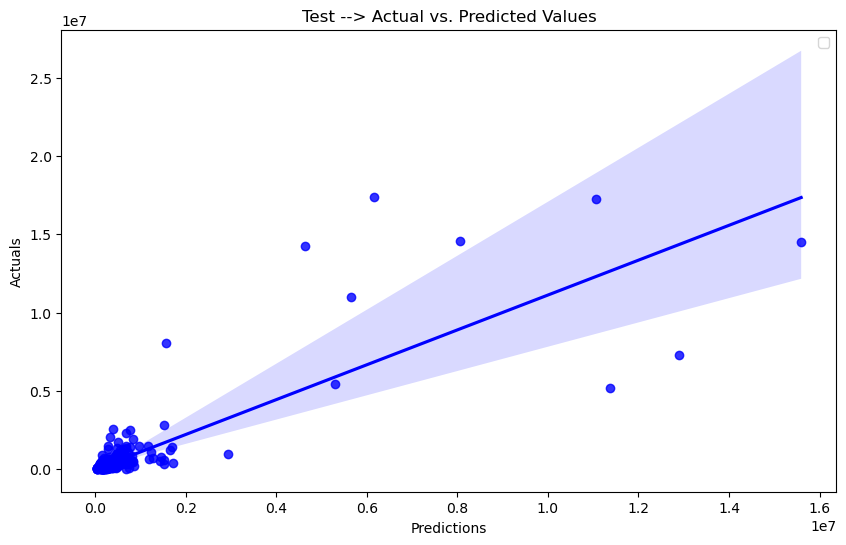

In [276]:
plt.figure(figsize=(10, 6))
sns.regplot(x=test_predictions, y=y_test, scatter=True, color='blue')
plt.xlabel("Predictions")
plt.ylabel("Actuals")
plt.title("Test --> Actual vs. Predicted Values")
plt.legend()
plt.show()


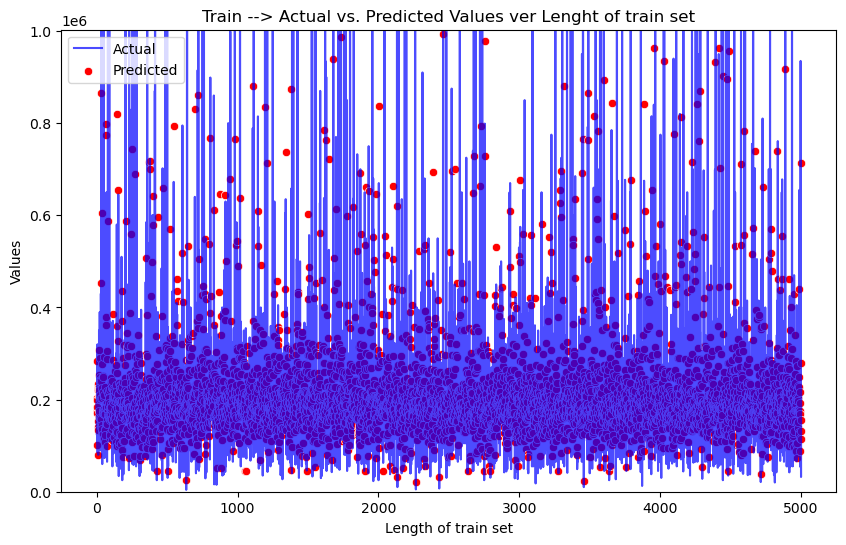

In [277]:
# Assuming you have a DataFrame named df with a "Date" column
# Plot actual vs. predicted values over time
y_limit = y_train.mean()+y_train.std()

plt.figure(figsize=(10, 6))
sns.lineplot(x=range(len(y_train)), y=y_train, label="Actual", color="blue", alpha=0.7)
sns.scatterplot(x=range(len(y_train)), y=train_predictions, label="Predicted", color="red", alpha=1)
plt.ylim(0, y_limit)
plt.xlabel("Length of train set")
plt.ylabel("Values")
plt.title("Train --> Actual vs. Predicted Values ver Lenght of train set")
plt.legend()
plt.show()


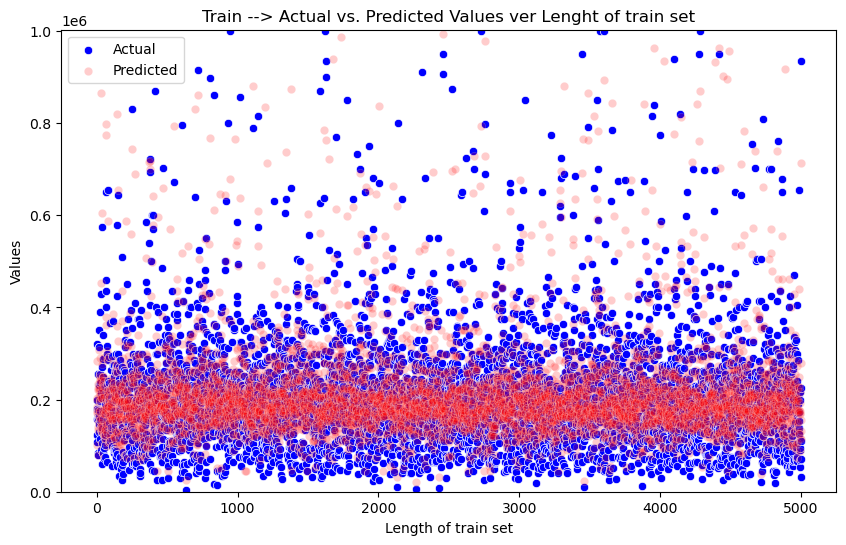

In [278]:
# Assuming you have a DataFrame named df with a "Date" column
# Plot actual vs. predicted values over time
y_limit = y_train.mean()+y_train.std()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=range(len(y_train)), y=y_train, label="Actual", color="blue", alpha=1)
sns.scatterplot(x=range(len(y_train)), y=train_predictions, label="Predicted", color="red", alpha=0.2)
plt.ylim(0, y_limit)
plt.xlabel("Length of train set")
plt.ylabel("Values")
plt.title("Train --> Actual vs. Predicted Values ver Lenght of train set")
plt.legend()
plt.show()


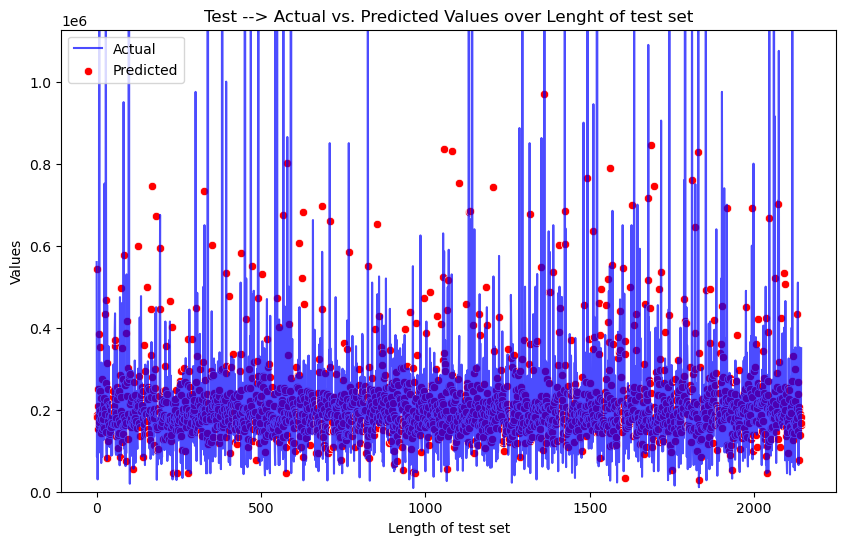

In [279]:
# Assuming you have a DataFrame named df with a "Date" column
# Plot actual vs. predicted values over time
y_limit = y_test.mean()+y_test.std()

plt.figure(figsize=(10, 6))
sns.lineplot(x=range(len(y_test)), y=y_test, label="Actual", color="blue", alpha=0.7)
sns.scatterplot(x=range(len(y_test)), y=test_predictions, label="Predicted", color="red", alpha=1)
plt.ylim(0, y_limit)
plt.xlabel("Length of test set")
plt.ylabel("Values")
plt.title("Test --> Actual vs. Predicted Values over Lenght of test set")
plt.legend()
plt.show()


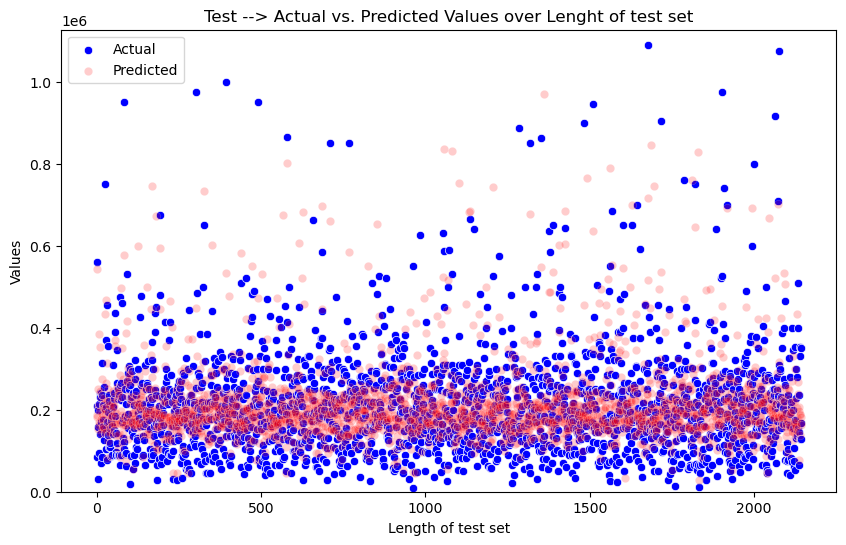

In [280]:
# Assuming you have a DataFrame named df with a "Date" column
# Plot actual vs. predicted values over time
y_limit = y_test.mean()+y_test.std()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=range(len(y_test)), y=y_test, label="Actual", color="blue", alpha=1)
sns.scatterplot(x=range(len(y_test)), y=test_predictions, label="Predicted", color="red", alpha=0.2)
plt.ylim(0, y_limit)
plt.xlabel("Length of test set")
plt.ylabel("Values")
plt.title("Test --> Actual vs. Predicted Values over Lenght of test set")
plt.legend()
plt.show()


In [281]:
# ChatGPT was used here partially: https://chat.openai.com/c/3536258e-5092-440b-9298-b9f30af8485d

# Assuming test_predictions and y_test are numpy arrays or lists
# Convert them to pandas Series if they are not already
test_predictions_series = pd.Series(test_predictions, name='Predicted')
y_test_series = pd.Series(y_test, name='Actual')

# Ensure that the indices align
test_predictions_series.index = range(len(test_predictions_series))
y_test_series.index = range(len(y_test_series))

# Concatenate the two Series into one DataFrame
result_df = pd.concat([test_predictions_series, y_test_series], axis=1)

result_df["Residuals"] = result_df["Actual"] - result_df["Predicted"]
result_df["Residuals_abs"] = abs(result_df["Residuals"])

# Print the resulting DataFrame
result_df


Predicted    Actual      Residuals  Residuals_abs
0     542264.525397  560000.0   17735.474603   17735.474603
1     186515.564028   85000.0 -101515.564028  101515.564028
2     181391.185868  208000.0   26608.814132   26608.814132
3     151738.409411   30000.0 -121738.409411  121738.409411
4     209827.788831  158000.0  -51827.788831   51827.788831
...             ...       ...            ...            ...
2139  137667.889560  128000.0   -9667.889560    9667.889560
2140  189245.346305  332000.0  142754.653695  142754.653695
2141  162824.733976  167000.0    4175.266024    4175.266024
2142  182690.479042  129100.0  -53590.479042   53590.479042
2143  168779.710226  350000.0  181220.289774  181220.289774

[2144 rows x 4 columns]

In [282]:
y_limit = y_test.mean()+y_test.std()

# Create the line plot
fig = px.line(result_df, x=result_df.index, y=["Actual", "Predicted"], 
              title='Test --> Actual vs. Predicted Values over Lenght of test set')

# Set line dash style for each line
for i in range(len(fig.data)):
    fig.update_traces(line_dash='dashdot' if i == 0 else 'solid', selector=dict(name=fig.data[i].name))

# Set axis titles
fig.update_xaxes(title_text="Lenght of test set")  # Set x-axis title
# You can update y-axis title similarly if needed
fig.update_yaxes(title_text="Value") 
fig.update_yaxes(range=[0, y_limit])  # Specify the y-axis limits as [min, max]

# Show the plot
fig.show()


In [283]:
# Create the line plot
fig = px.line(result_df, x=result_df.index, y="Residuals", 
              title='Test --> Residuals over Lenght of test set')

# Set axis titles
fig.update_xaxes(title_text="Lenght of test set")  # Set x-axis title
# You can update y-axis title similarly if needed
fig.update_yaxes(title_text="Value") 

# Set hover information for the data points or lines
hover_template = (
    '<b>%{y}</b>'
    '<br>Index: %{x}'
    '<br>Actual 1: %{customdata[0]}'
    '<br>Predicted 2: %{customdata[1]}'
)
fig.update_traces(hovertemplate=hover_template,
                  customdata=np.column_stack((result_df['Actual'], result_df['Predicted'])))

# Show the plot
fig.show()


In [284]:
actual_std_dev = np.std(result_df['Actual'])
y_limit = y_test.mean()+y_test.std()

# Create the line plot
fig = px.line(result_df, x=result_df.index, y=["Actual", "Predicted"], 
              title='Test --> Actual vs. Predicted Values over Lenght of test set')

# Set line dash style for each line
for i in range(len(fig.data)):
    fig.update_traces(line_dash='dashdot' if i == 0 else 'solid', selector=dict(name=fig.data[i].name))

# Add shaded areas representing the standard deviation
fig.add_trace(go.Scatter(
    x=result_df.index,
    y=result_df['Actual'] + actual_std_dev,
    fill='tonexty',  # Fill area between the line and the upper limit
    fillcolor='rgba(255, 165, 165, 0.3)',  # Adjust color and transparency as needed
    line=dict(width=0),
    name='Actual + Std Dev'
))

fig.add_trace(go.Scatter(
    x=result_df.index,
    y=result_df['Actual'] - actual_std_dev,
    fill='tonexty',  # Fill area between the line and the lower limit
    fillcolor='rgba(255, 165, 165, 0.3)',  # Adjust color and transparency as needed
    line=dict(width=0),
    name='Actual - Std Dev'
))

fig.update_traces(selector=dict(name='Predicted'), line=dict(color='rgba(240, 128, 128, 0.5)'))


# Set axis titles
fig.update_xaxes(title_text="Lenght of test set")  # Set x-axis title
# You can update y-axis title similarly if needed
fig.update_yaxes(title_text="Value") 
fig.update_yaxes(range=[0, y_limit])  # Specify the y-axis limits as [min, max]

# Show the plot
fig.show()



Visualizations of the final model from GridSearchCV results table

In [285]:
#Safe as dataframe
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0          1.081207      0.061711         0.041610        0.020812   
1          1.165997      0.088376         0.045464        0.006601   
2          1.036811      0.056989         0.031201        0.002584   
3          1.411946      0.144033         0.073104        0.008797   
4          1.461076      0.031574         0.058992        0.014378   
...             ...           ...              ...             ...   
1076       4.002990      0.213067         0.114738        0.034642   
1077       5.553477      0.268974         0.190749        0.057518   
1078       6.066607      0.224345         0.134478        0.016722   
1079       5.555950      0.247601         0.097640        0.009903   
1080       1.130115      0.040097         0.059050        0.003032   

                                            param_model  \
0     (DecisionTreeRegressor(max_depth=20, max_featu...   
1     (DecisionTreeRegressor(max_depth=20, max_featu...   
2     (DecisionTreeRegressor(max_depth=20, max_featu...   
3     (DecisionTreeRegressor(max_depth=20, max_featu...   
4     (DecisionTreeRegressor(max_depth=20, max_featu...   
...                                                 ...   
1076  (DecisionTreeRegressor(max_depth=20, max_featu...   
1077  (DecisionTreeRegressor(max_depth=20, max_featu...   
1078  (DecisionTreeRegressor(max_depth=20, max_featu...   
1079  (DecisionTreeRegressor(max_depth=20, max_featu...   
1080                                 LinearRegression()   

     param_model__bootstrap param_model__criterion param_model__max_depth  \
0                      True          squared_error                   None   
1                      True          squared_error                   None   
2                      True          squared_error                   None   
3                      True          squared_error                   None   
4                      True          squared_error                   None   
...                     ...                    ...                    ...   
1076                  False          squared_error                     20   
1077                  False          squared_error                     20   
1078                  False          squared_error                     20   
1079                  False          squared_error                     20   
1080                    NaN                    NaN                    NaN   

     param_model__max_features param_model__min_samples_leaf  ...  \
0                         log2                             1  ...   
1                         log2                             1  ...   
2                         log2                             1  ...   
3                         log2                             1  ...   
4                         log2                             1  ...   
...                        ...                           ...  ...   
1076                      log2                            15  ...   
1077                      log2                            15  ...   
1078                      log2                            15  ...   
1079                      log2                            15  ...   
1080                       NaN                           NaN  ...   

     split3_test_score mean_test_score std_test_score rank_test_score  \
0        -3.539630e+05   -4.841445e+05   1.388260e+05               9   
1        -3.275506e+05   -5.143634e+05   1.461724e+05             191   
2        -3.275506e+05   -5.143634e+05   1.461724e+05             191   
3        -3.382335e+05   -4.840247e+05   1.486680e+05               8   
4        -3.215383e+05   -5.077060e+05   1.505793e+05             119   
...                ...             ...            ...             ...   
1076     -3.493398e+05   -5.321593e+05   1.361671e+05             785   
1077     -3.747545e+05   -5.269146e+05   1.085407e+05             647   
1078     -3.479739e+05   -5.327266e+05   1.37

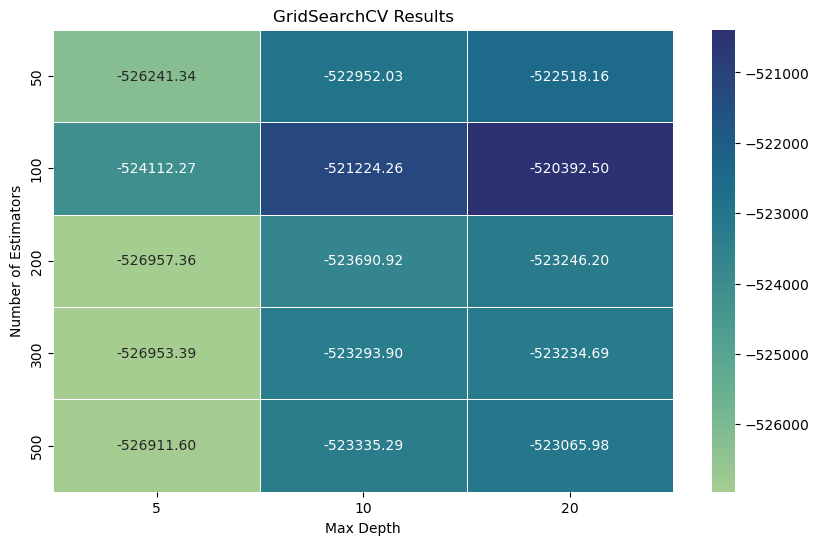

In [286]:
# Create the heatmap
heatmap_data = cv_results.pivot_table(index='param_model__n_estimators', 
                                      columns='param_model__max_depth', 
                                      values='mean_test_score')

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap="crest", fmt=".2f", linewidths=.5)
plt.title('GridSearchCV Results')
plt.xlabel('Max Depth')
plt.ylabel('Number of Estimators')
plt.show()


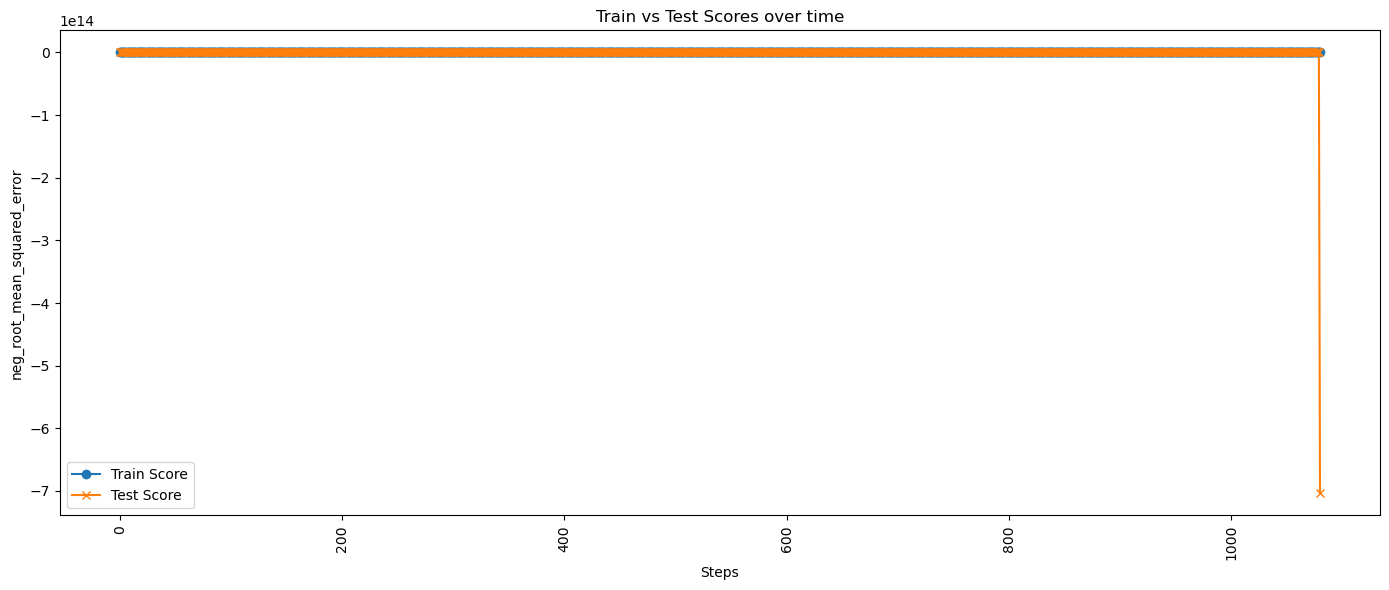

In [287]:

results = cv_results

# Extract parameter values and scores
train_scores = results['mean_train_score']
test_scores = results['mean_test_score']

# Plotting
plt.figure(figsize=(14, 6))

# Plot train scores
plt.plot(range(len(train_scores)), train_scores, label='Train Score', marker='o')

# Plot test scores
plt.plot(range(len(test_scores)), test_scores, label='Test Score', marker='x')

# Customize plot
plt.xticks(rotation=90)
plt.xlabel('Steps')
plt.ylabel('neg_root_mean_squared_error')
plt.title('Train vs Test Scores over time')
plt.legend()
plt.tight_layout()

# Show plot
plt.show()


In [288]:
# Assuming you have your train_scores and test_scores already defined
# Replace this with your actual data

# Plot train scores
train_trace = go.Scatter(
    x=list(range(len(train_scores))),
    y=train_scores,
    mode='lines+markers',
    name='Train Score'
)

# Plot test scores
test_trace = go.Scatter(
    x=list(range(len(test_scores))),
    y=test_scores,
    mode='lines+markers',
    name='Test Score'
)


# Layout configuration
layout = go.Layout(
    title='Train vs Test Scores over time',
    xaxis=dict(
        title='Steps',
        tickangle=90
    ),
    yaxis=dict(
        title='neg_root_mean_squared_error'
    ),
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ),
    margin=dict(l=40, r=40, t=80, b=40)
)

# Create figure
fig = go.Figure(data=[train_trace, test_trace], layout=layout)

# Set hover information for the data points or lines
hover_template = (
    '<b>%{y}</b>'
    '<br>Index: %{x}'
    '<br>No. estimators: %{customdata[0]}'
    '<br>Min_samples_leaf: %{customdata[1]}'
)
fig.update_traces(hovertemplate=hover_template,
                  customdata=np.column_stack((cv_results['param_model__max_depth'], cv_results['param_model__min_samples_leaf'])))


# Show plot
fig.show()
